<a href="https://colab.research.google.com/github/MAHANTH-wq/University-Project/blob/branch_2/ANNCode_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import os
import sys
import time
import pickle
import seaborn
from scipy import stats
from sklearn import svm, preprocessing
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, f1_score
import matplotlib.pyplot as plt

In [2]:
#project results part
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#project results part
df= pd.read_csv("/content/drive/MyDrive/data.csv")
#df = pd.read_csv("data.csv")
print(df.columns)
df

Index(['Username', 'Major', 'Specialization', 'Department',
       'User Profile Link', 'Term & Year', 'UG College', 'University Name',
       'Program', 'Research Exp', 'Industry Exp', 'Intern Exp', 'Journal Pubs',
       'ConfPubs', 'TOEFL Score', 'TOEFL Essay', 'greV', 'greQ', 'greA',
       'gmatA', 'gmatQ', 'gmatV', 'Topper CGPA', 'CGPA', 'CGPA Scale',
       'Admission'],
      dtype='object')


,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
0,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
1,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,University of Southern California,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
2,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
3,aashishg11,Electrical Engineering,Automation,Instrumentation,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,144.0,157.0,3.0,NaN,NaN,NaN,73.00,56.11,100.0,0
4,prnk_us,Computer Science,Security,IT,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A D Patel Institute Of Technology,Arizona State University,MS,0,...,149.0,157.0,3.0,NaN,NaN,NaN,8.50,7.71,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53638,vins747,NaN,NaN,0,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,NaN,Worcester Polytechnic Institute,MS,0,...,149.0,158.0,3.5,NaN,NaN,NaN,0.00,6.60,100.0,1
53639,ameed.haikal,Biomedical Engineering,NaN,0,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,NaN,Worcester Polytechnic Institute,PhD,10,...,155.0,160.0,3.5,NaN,NaN,NaN,0.00,6.34,10.0,0
53640,downing,Electrical Engineering,Power,0,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,NaN,Worcester Polytechnic Institute,MS,0,...,490.0,790.0,3.0,NaN,NaN,NaN,0.00,0.00,0.0,0
53641,fancy3361,software engineering,NaN,0,http://www.edulix.com/unisearch/user.php?uid=2...,Spring - 2014,NaN,Worcester Polytechnic Institute,MS,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0


In [4]:
df.dropna()

,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
15914,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,North Carolina State University,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,1
16149,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,SUNY Stony Brook,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,1
16507,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,University of Massachusetts Amherst,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,0
16806,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,University of Utah,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,1
16829,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,University of Wisconsin Madison,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,0
16838,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,Virginia Polytechnic Institute and State Unive...,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,0
25106,Niteshd7,Information Technology,MIS,0,http://www.edulix.com/unisearch/user.php?uid=2...,Fall - 2015,Nagpur University,University of Arizona,MS,0,...,153.0,156.0,4.0,5.0,44.0,33.0,76.0,62.1,100.0,1


In [5]:
# df = df[~(df['UG College'] == 'NaN')]
df = df[pd.notnull(df['UG College'])]
df

,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
0,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
1,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,University of Southern California,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
2,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
3,aashishg11,Electrical Engineering,Automation,Instrumentation,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,144.0,157.0,3.0,NaN,NaN,NaN,73.00,56.11,100.0,0
4,prnk_us,Computer Science,Security,IT,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A D Patel Institute Of Technology,Arizona State University,MS,0,...,149.0,157.0,3.0,NaN,NaN,NaN,8.50,7.71,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,Texas A and M University College Station,MS,0,...,680.0,800.0,3.0,NaN,NaN,NaN,3.71,3.68,4.0,0
51320,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Pennsylvania,MS,0,...,154.0,169.0,3.0,NaN,NaN,NaN,0.00,87.00,100.0,1
51321,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,University of Southern California,MS,0,...,680.0,800.0,3.0,NaN,NaN,NaN,3.71,3.68,4.0,1
51322,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Southern California,MS,0,...,154.0,169.0,3.0,NaN,NaN,NaN,0.00,87.00,100.0,1


In [6]:
df = df.fillna(0)
df

,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
0,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,...,430.0,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1
1,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,University of Southern California,MS,0,...,430.0,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1
2,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,430.0,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1
3,aashishg11,Electrical Engineering,Automation,Instrumentation,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,144.0,157.0,3.0,0.0,0.0,0.0,73.00,56.11,100.0,0
4,prnk_us,Computer Science,Security,IT,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A D Patel Institute Of Technology,Arizona State University,MS,0,...,149.0,157.0,3.0,0.0,0.0,0.0,8.50,7.71,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,Texas A and M University College Station,MS,0,...,680.0,800.0,3.0,0.0,0.0,0.0,3.71,3.68,4.0,0
51320,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Pennsylvania,MS,0,...,154.0,169.0,3.0,0.0,0.0,0.0,0.00,87.00,100.0,1
51321,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,University of Southern California,MS,0,...,680.0,800.0,3.0,0.0,0.0,0.0,3.71,3.68,4.0,1
51322,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Southern California,MS,0,...,154.0,169.0,3.0,0.0,0.0,0.0,0.00,87.00,100.0,1


In [7]:
df.dtypes

Username              object
Major                 object
Specialization        object
Department            object
User Profile Link     object
Term & Year           object
UG College            object
University Name       object
Program               object
Research Exp           int64
Industry Exp           int64
Intern Exp           float64
Journal Pubs         float64
ConfPubs             float64
TOEFL Score          float64
TOEFL Essay          float64
greV                 float64
greQ                 float64
greA                 float64
gmatA                float64
gmatQ                float64
gmatV                float64
Topper CGPA          float64
CGPA                 float64
CGPA Scale           float64
Admission              int64
dtype: object

In [8]:
df.describe()

,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
count,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000
mean,0.346037,4.159886,0.465942,0.040020,0.051087,101.798847,5.466324,321.479951,419.027336,4.872961,0.106353,0.117255,0.074585,36.753957,40.286508,56.643695,0.514671
std,2.617488,12.165493,2.491681,0.294584,0.344925,43.859469,10.796335,216.072739,322.024787,36.547059,6.960437,2.610511,1.915089,37.481102,32.334540,45.379822,0.499790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,151.000000,162.000000,3.000000,0.000000,0.000000,0.000000,8.700000,8.252000,10.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,0.000000,159.000000,168.000000,3.500000,0.000000,0.000000,0.000000,9.650000,57.000000,100.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,540.000000,770.000000,4.000000,0.000000,0.000000,0.000000,80.000000,72.000000,100.000000,1.000000
max,53.000000,138.000000,96.000000,12.000000,8.000000,1350.000000,60.000000,5560.000000,7990.000000,1470.000000,740.000000,168.000000,152.000000,100.000000,102.000000,100.000000,1.000000


In [9]:
le = preprocessing.LabelEncoder()
df['UG label'] = le.fit_transform(df['UG College'].astype(str))
df

,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,...,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1,0
1,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,University of Southern California,MS,0,...,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1,0
2,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1,0
3,aashishg11,Electrical Engineering,Automation,Instrumentation,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,157.0,3.0,0.0,0.0,0.0,73.00,56.11,100.0,0,0
4,prnk_us,Computer Science,Security,IT,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A D Patel Institute Of Technology,Arizona State University,MS,0,...,157.0,3.0,0.0,0.0,0.0,8.50,7.71,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,Texas A and M University College Station,MS,0,...,800.0,3.0,0.0,0.0,0.0,3.71,3.68,4.0,0,1401
51320,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Pennsylvania,MS,0,...,169.0,3.0,0.0,0.0,0.0,0.00,87.00,100.0,1,1401
51321,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,University of Southern California,MS,0,...,800.0,3.0,0.0,0.0,0.0,3.71,3.68,4.0,1,1401
51322,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Southern California,MS,0,...,169.0,3.0,0.0,0.0,0.0,0.00,87.00,100.0,1,1401


In [10]:
df = df.drop(columns=['Username', 'Specialization', 'Major', 'Department', 'User Profile Link', 'Term & Year', 'UG College', 'gmatV', 'gmatQ', 'gmatA'])
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,72.27,100.0,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,72.27,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,72.27,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,73.00,56.11,100.0,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.50,7.71,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,3.71,3.68,4.0,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.00,87.00,100.0,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,3.71,3.68,4.0,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.00,87.00,100.0,1,1401


In [11]:
df.describe()

,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
count,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000
mean,0.346037,4.159886,0.465942,0.040020,0.051087,101.798847,5.466324,321.479951,419.027336,4.872961,36.753957,40.286508,56.643695,0.514671,713.460584
std,2.617488,12.165493,2.491681,0.294584,0.344925,43.859469,10.796335,216.072739,322.024787,36.547059,37.481102,32.334540,45.379822,0.499790,430.167158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,151.000000,162.000000,3.000000,8.700000,8.252000,10.000000,0.000000,354.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,0.000000,159.000000,168.000000,3.500000,9.650000,57.000000,100.000000,1.000000,702.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,540.000000,770.000000,4.000000,80.000000,72.000000,100.000000,1.000000,1059.000000
max,53.000000,138.000000,96.000000,12.000000,8.000000,1350.000000,60.000000,5560.000000,7990.000000,1470.000000,100.000000,102.000000,100.000000,1.000000,1430.000000


In [12]:
l = len(df)
df = df[~(df['CGPA Scale'] == 0)]
l1 = len(df)
print(l-l1, "outliers removed.")

l = len(df)
df = df[~(df['CGPA'] == 0)]
l1 = len(df)
print(l-l1, "outliers removed.")

1105 outliers removed.
47 outliers removed.


In [13]:
df['CGPA'] = 10*df['CGPA']/df['CGPA Scale']
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,7.227,100.0,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,7.227,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,7.227,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,73.00,5.611,100.0,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.50,7.710,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,3.71,9.200,4.0,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.00,8.700,100.0,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,3.71,9.200,4.0,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.00,8.700,100.0,1,1401


In [14]:
df['Topper CGPA'] = 10*df['Topper CGPA']/df['CGPA Scale']
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,100.0,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,4.0,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.000,8.700,100.0,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,4.0,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.000,8.700,100.0,1,1401


In [15]:
df['Topper CGPA'] = df['Topper CGPA'].apply(lambda x: 9 if float(x)==0 else float(x))
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,100.0,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,4.0,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,100.0,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,4.0,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,100.0,1,1401


In [16]:
df = df.drop(columns=['CGPA Scale'])
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [17]:
# Outlier Removal
l = len(df)
df = df[~(df['CGPA'] <= 3)]
l1 = len(df)
print(l-l1, 'outliers removed.')
# df.reset_index(inplace=True)

493 outliers removed.


In [18]:
# Outlier Removal
l = len(df)
df = df[~(df['CGPA'] > 10)]
l1 = len(df)
print(l-l1, 'outliers removed.')
# df.reset_index(inplace=True)

54 outliers removed.


In [19]:
# Outlier Removal
l = len(df)
df = df[~(df['Topper CGPA'] > 10)]
l1 = len(df)
print(l-l1, 'outliers removed.')
# df.reset_index(inplace=True)

3 outliers removed.


In [20]:
# Outlier Removal
l = len(df)
df = df[~(df['Topper CGPA'] <= 5.5)]
l1 = len(df)
print(l-l1, 'outliers removed.')
# df.reset_index(inplace=True)

26 outliers removed.


In [21]:
mean_greA = df['greA'].mean()
print(mean_greA)
df['greA'] = df['greA'].apply(lambda x: mean_greA if x == 0 else x)
df

4.860474231792887


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [22]:
mean_greQ = df['greQ'].mean()
print(mean_greQ)
df['greQ'] = df['greQ'].apply(lambda x: mean_greQ if x == 0 else x)
df

419.52859101540446


,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [23]:
mean_greV = df['greV'].mean()
print(mean_greV)
df['greV'] = df['greV'].apply(lambda x: mean_greV if x == 0 else x)
df

321.99352770384706


,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [24]:
def func0(program):
    if program.upper() == 'MS':
        return 0
    elif program.upper() == 'PHD':
        return 1
    else:
        return 2
df['Program'] = df['Program'].apply(func0)
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [25]:
# def func1(name):
#     name = name.upper()
#     if name == 'IIT':
#         return 0
#     elif name == 'IIIT':
#         return 1
#     elif name == 'NIT':
#         return 2
#     else:
#         return 3
# df['ugCollege'] = df['ugCollege'].apply(func1)
# df

In [26]:
univ=['Carnegie Mellon University',
       'University of North Carolina Chapel Hill',
       'University of Illinois Urbana-Champaign',
       'University of California San Diego',
       'University of Minnesota Twin Cities',
       'Texas A and M University College Station',
       'Georgia Institute of Technology', 'University of Texas Austin',
       'University of Michigan Ann Arbor', 'Columbia University',
       'University of Maryland College Park', 'Arizona State University',
       'University of Cincinnati', 'Ohio State University Columbus',
       'North Carolina State University', 'Northeastern University',
       'University of Arizona', 'University of Wisconsin Madison',
       'SUNY Buffalo', 'Clemson University', 'University of Utah',
       'Rutgers University New Brunswick/Piscataway',
       'Virginia Polytechnic Institute and State University',
       'Stanford University', 'Massachusetts Institute of Technology',
       'California Institute of Technology',
       'University of Massachusetts Amherst',
       'University of California Irvine', 'Purdue University',
       'Cornell University', 'University of Florida',
       'University of Washington', 'Syracuse University',
       'University of Pennsylvania', 'University of Southern California',
       'University of Texas Dallas', 'University of Illinois Chicago',
       'George Mason University', 'Harvard University',
       'Johns Hopkins University', 'SUNY Stony Brook',
       'Northwestern University', 'New York University',
       'New Jersey Institute of Technology',
       'University of California Santa Barbara', 'Princeton University',
       'University of Colorado Boulder',
       'University of California Los Angeles',
       'University of North Carolina Charlotte',
       'University of Texas Arlington', 'University of California Davis',
       'Worcester Polytechnic Institute',
       'University of California Santa Cruz', 'Wayne State University']
ranks = [48,90,75,45,156,189,72,65,21,18,136,215,561,101,285,344,262,56,340,701,353,262,327,2,1,5,305,219,111,14,167,68,581,15,129,501,231,801,3,24,359,31,39,751,135,13,206,35,90,301,104,601,367,484]
print(len(univ), len(ranks))
univdict = {univ[i]: ranks[i] for i in range(len(univ))} 
print(univdict)

54 54
{'Carnegie Mellon University': 48, 'University of North Carolina Chapel Hill': 90, 'University of Illinois Urbana-Champaign': 75, 'University of California San Diego': 45, 'University of Minnesota Twin Cities': 156, 'Texas A and M University College Station': 189, 'Georgia Institute of Technology': 72, 'University of Texas Austin': 65, 'University of Michigan Ann Arbor': 21, 'Columbia University': 18, 'University of Maryland College Park': 136, 'Arizona State University': 215, 'University of Cincinnati': 561, 'Ohio State University Columbus': 101, 'North Carolina State University': 285, 'Northeastern University': 344, 'University of Arizona': 262, 'University of Wisconsin Madison': 56, 'SUNY Buffalo': 340, 'Clemson University': 701, 'University of Utah': 353, 'Rutgers University New Brunswick/Piscataway': 262, 'Virginia Polytechnic Institute and State University': 327, 'Stanford University': 2, 'Massachusetts Institute of Technology': 1, 'California Institute of Technology': 5, '

In [27]:
ranking = []
# uniqueUnivs = list(df['University Name'].unique())
# print((uniqueUnivs))
for index, row in df.iterrows():
    # i = uniqueUnivs.index(row['University Name'])
    # print(row['University Name'])
    ranking.append(univdict[row['University Name']])
print(len(ranking), len(ranks))
df['ranking'] = ranking
df

49596 54


,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,New Jersey Institute of Technology,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,751
1,University of Southern California,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,129
2,Worcester Polytechnic Institute,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,601
3,Worcester Polytechnic Institute,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0,601
4,Arizona State University,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401,189
51320,University of Pennsylvania,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,15
51321,University of Southern California,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401,129
51322,University of Southern California,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,129


In [28]:
df = df.drop(columns='University Name')
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,751
1,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,129
2,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,601
3,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0,601
4,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401,189
51320,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,15
51321,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401,129
51322,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,129


In [29]:
df.reset_index(inplace=True)
df = df.drop(columns=['index'])
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,751
1,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,129
2,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,601
3,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0,601
4,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49591,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401,189
49592,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,15
49593,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401,129
49594,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,129


In [30]:
def func2(x):
    if x > 0 and x < 101:
        return 0
    elif x > 100 and x < 251:
        return 1
    elif x > 250 and x < 401:
        return 2
    else:
        return 3

flag = 0
if flag == 1:
    df["rank"] = df["ranking"].apply(func2)
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,751
1,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,129
2,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,601
3,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0,601
4,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49591,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401,189
49592,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,15
49593,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401,129
49594,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,129


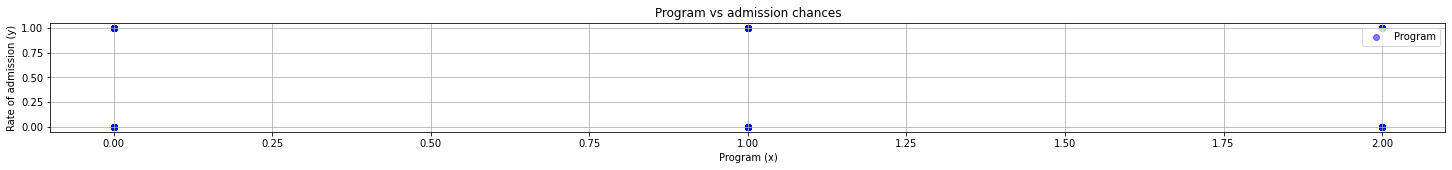

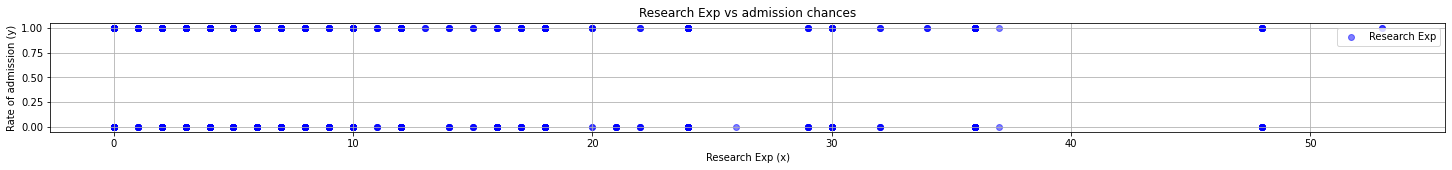

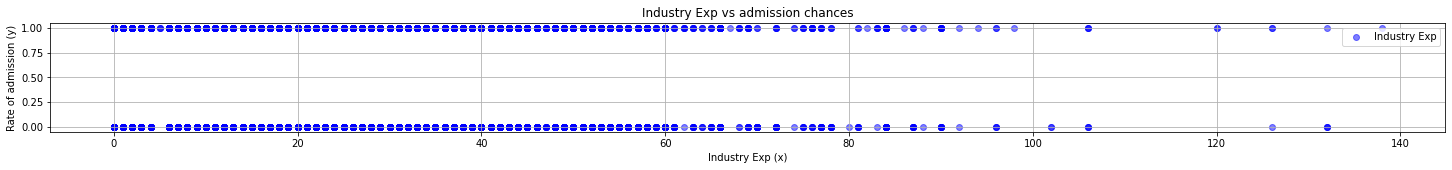

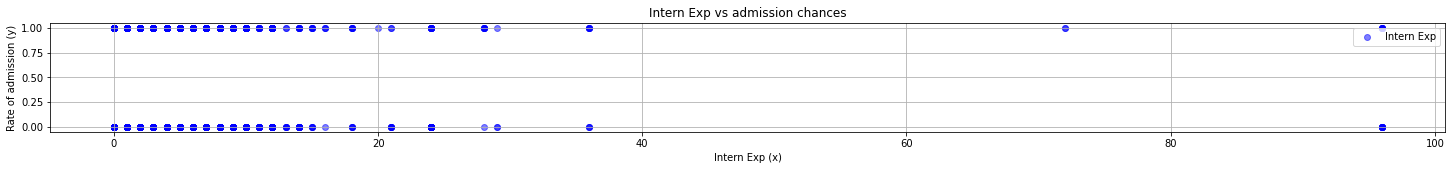

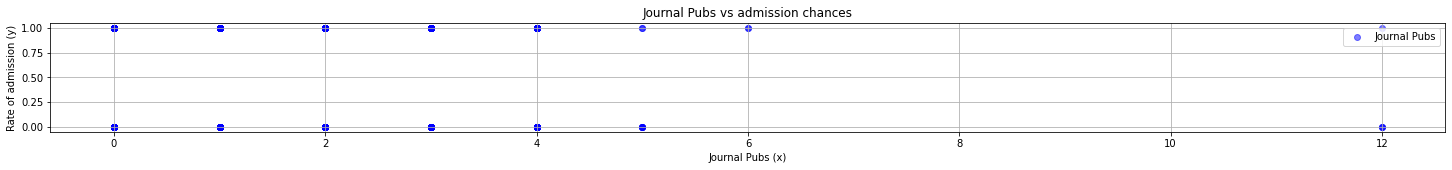

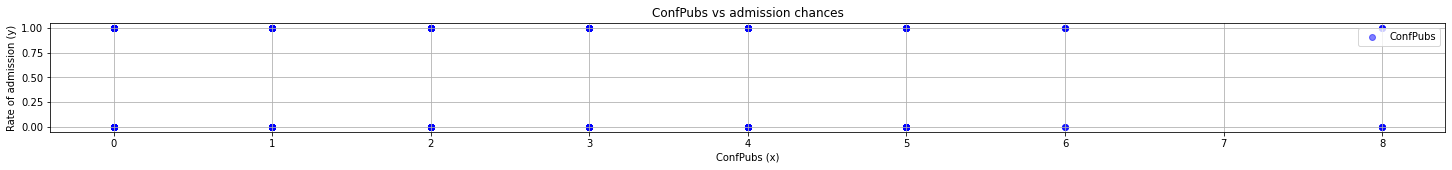

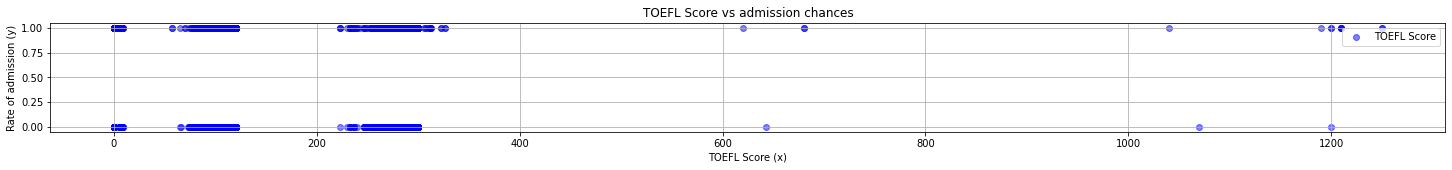

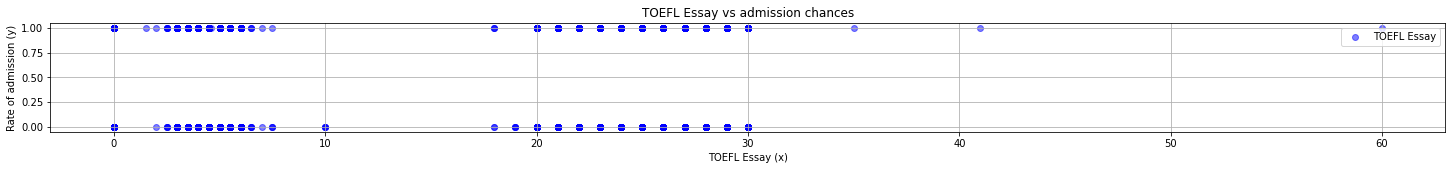

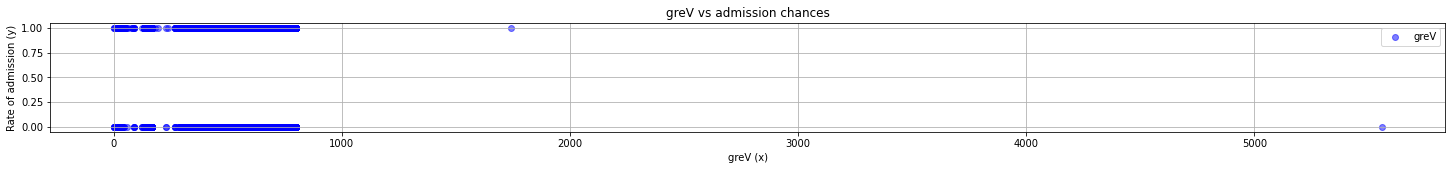

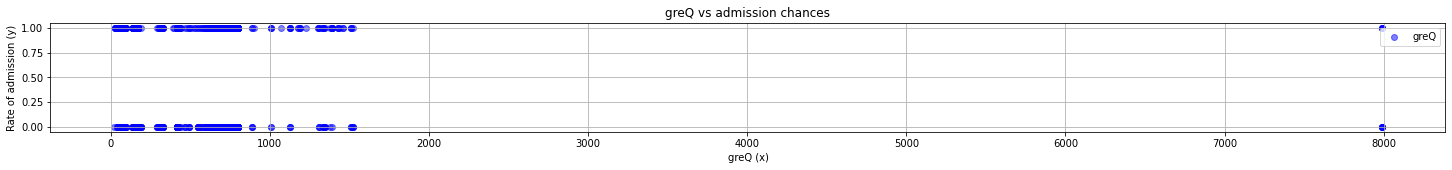

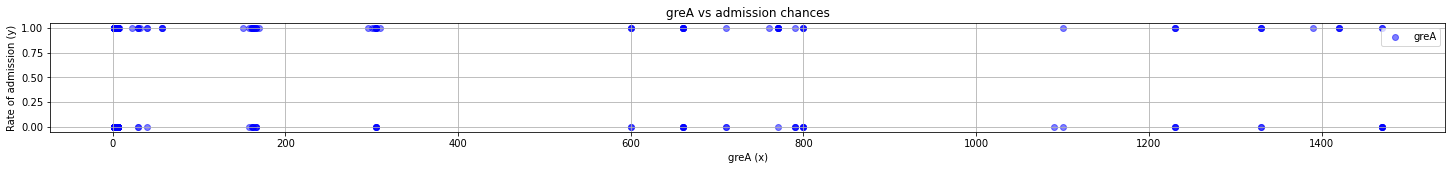

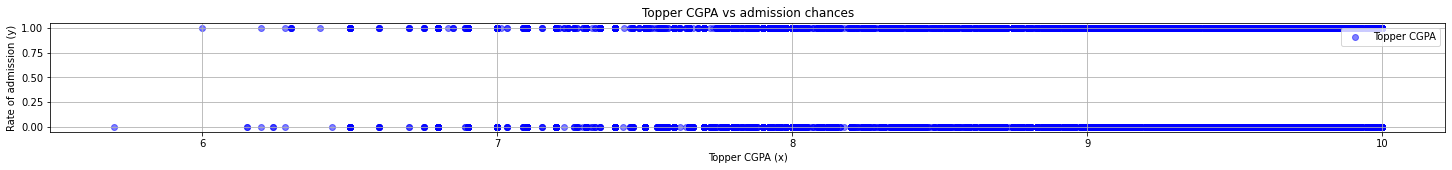

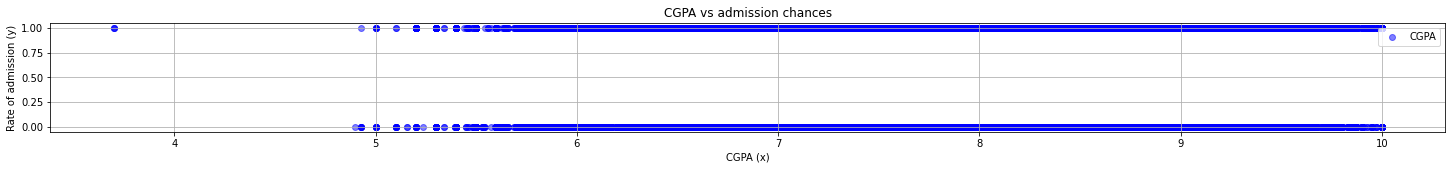

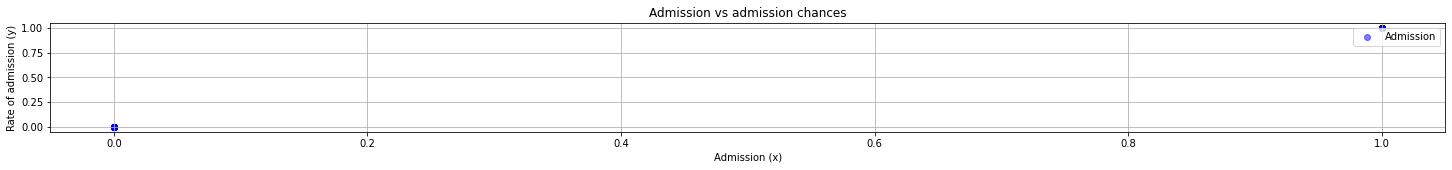

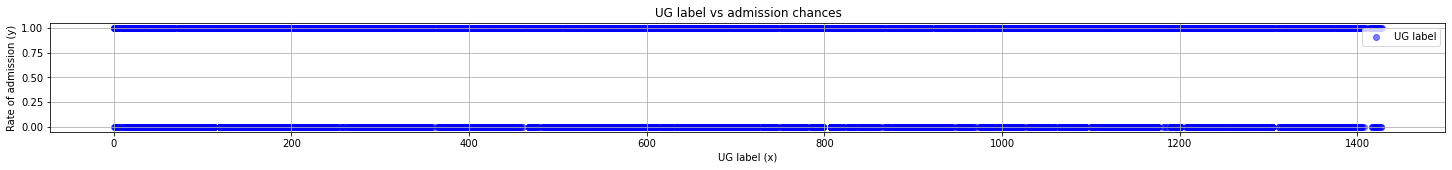

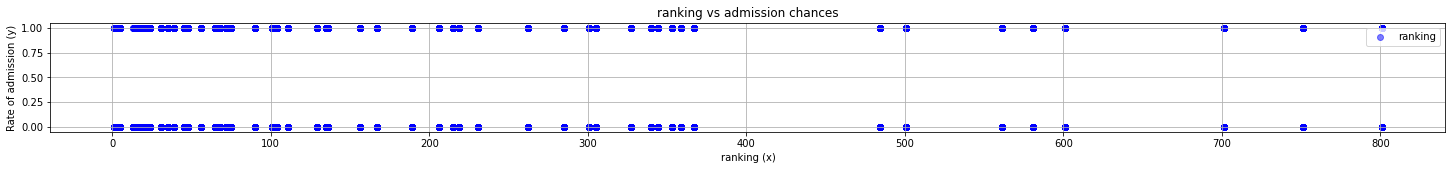

In [31]:
df_y = df['Admission']

# To check whether a column has very uneven distribution of class of y (0 or 1)
for i in range(len(df.columns)):
    plt.figure(i, figsize=(25,2))
    plt.title(df.columns[i] + ' vs admission chances')
    plt.scatter(df.iloc[:, i], df_y, c='blue', label=df.columns[i], alpha=0.5)
    plt.xlabel(df.columns[i] + ' (x)')
    plt.ylabel('Rate of admission (y)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [33]:
df['z'] = np.abs(stats.zscore(df['greQ']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_greQ.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 2)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

70 outliers removed.


In [34]:
df['z'] = np.abs(stats.zscore(df['greV']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_greV.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 2)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

231 outliers removed.


In [35]:
df['z'] = np.abs(stats.zscore(df['greA']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_greA.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 0.1)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

91 outliers removed.


In [36]:
df['z'] = np.abs(stats.zscore(df['TOEFL Essay']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_TOEFL Essay.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 2.5)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

2 outliers removed.


In [37]:
df['z'] = np.abs(stats.zscore(df['TOEFL Score']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_TOEFL Score.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 4.6)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

73 outliers removed.


In [38]:
df['z'] = np.abs(stats.zscore(df['Journal Pubs']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_Journal Pubs.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 4)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

402 outliers removed.


In [39]:
df['z'] = np.abs(stats.zscore(df['Intern Exp']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_Intern Exp.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 3)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

706 outliers removed.


In [40]:
df['z'] = np.abs(stats.zscore(df['Industry Exp']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_Industry Exp.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 4.2)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

502 outliers removed.


In [41]:
df_y = df['Admission']
df = df.drop(columns='Admission')

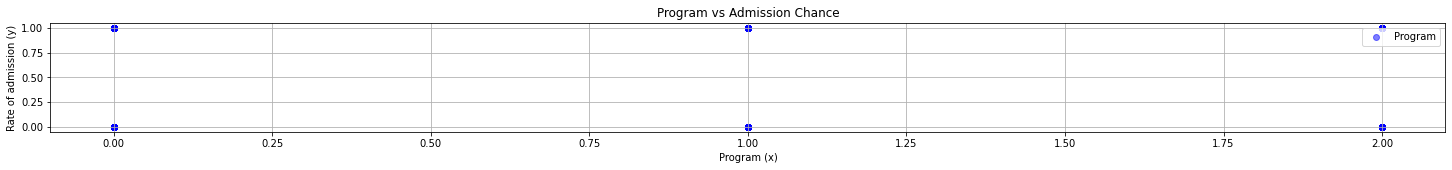

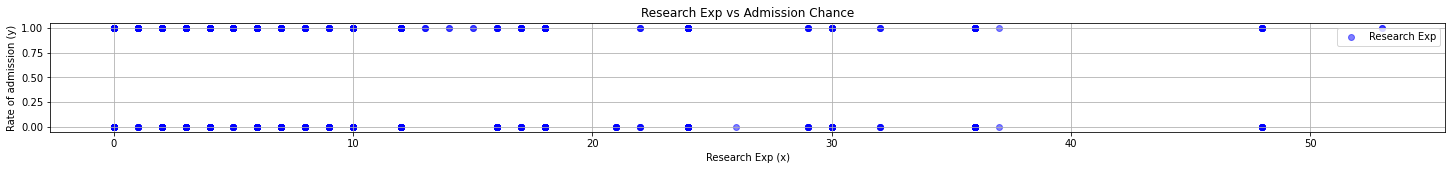

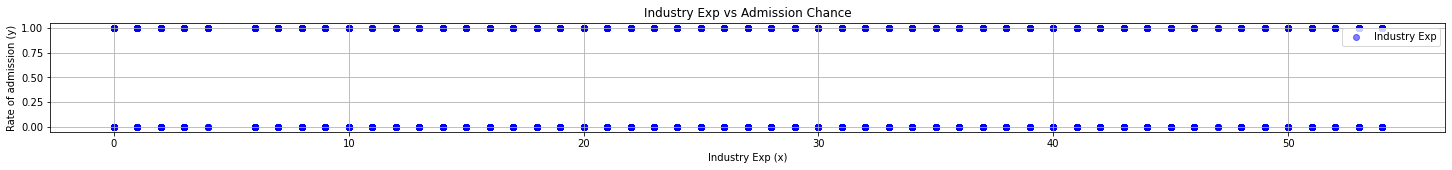

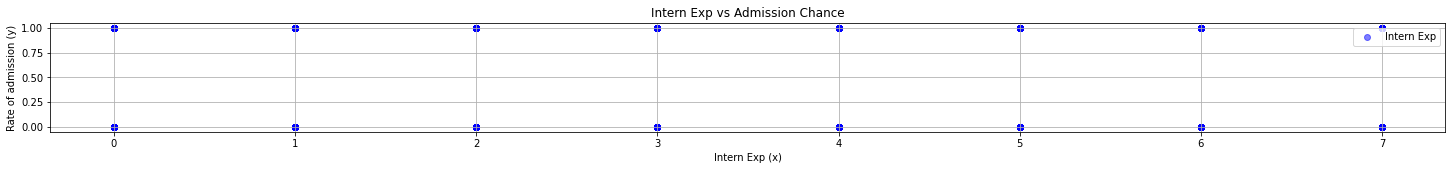

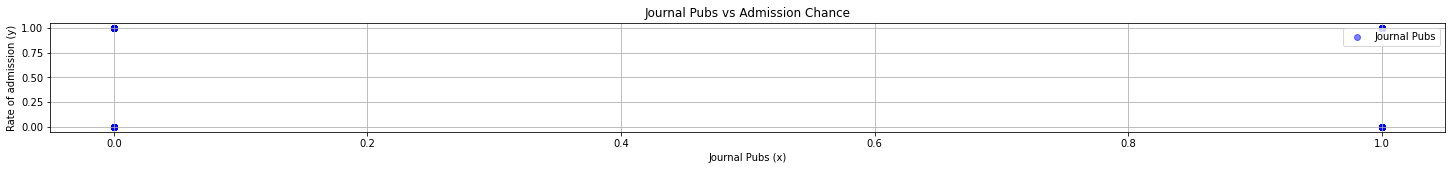

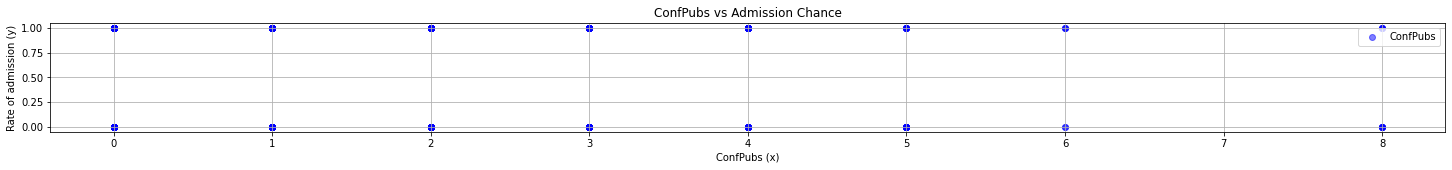

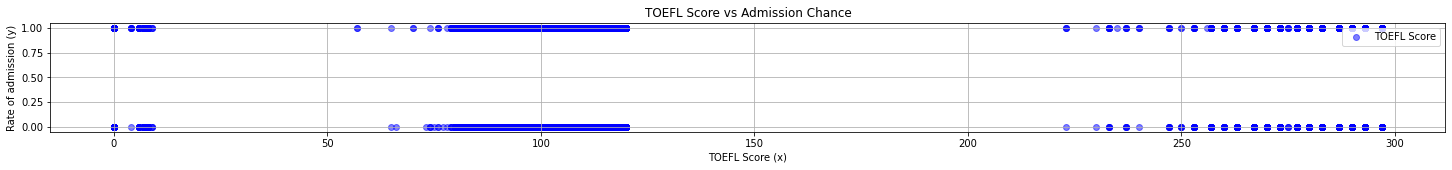

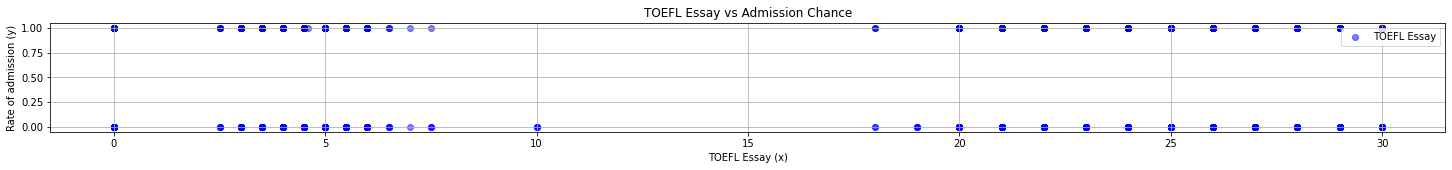

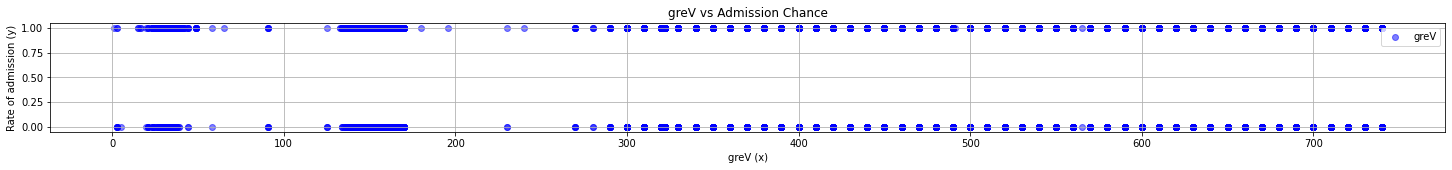

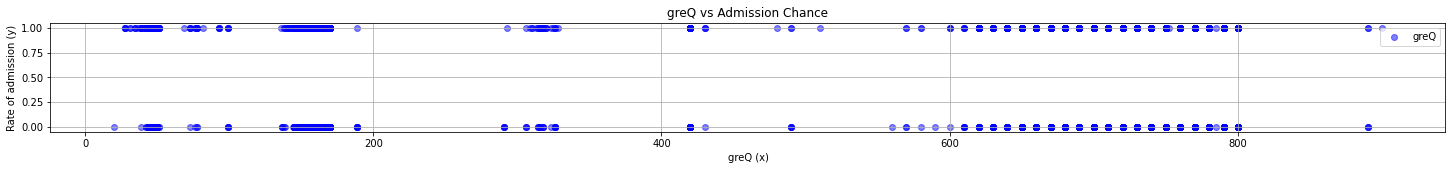

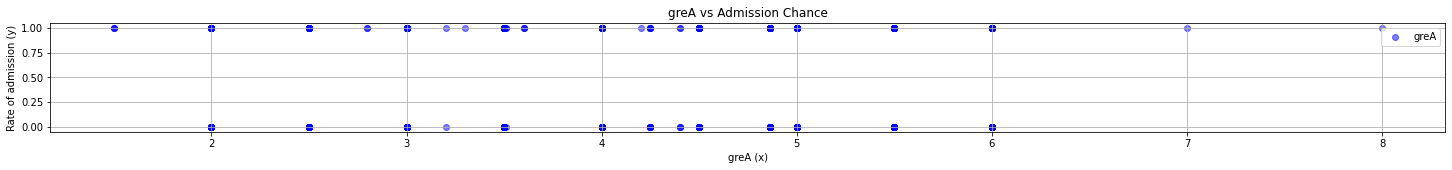

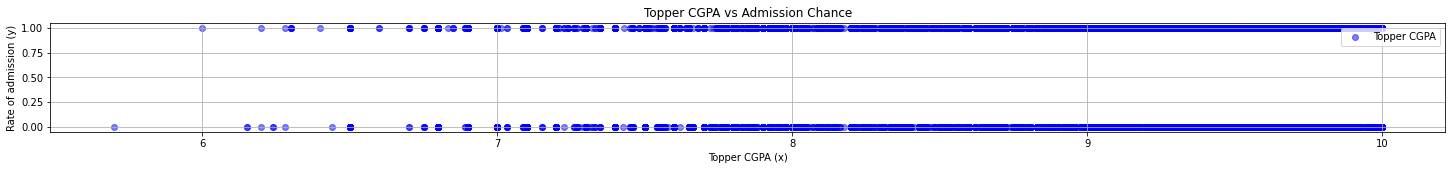

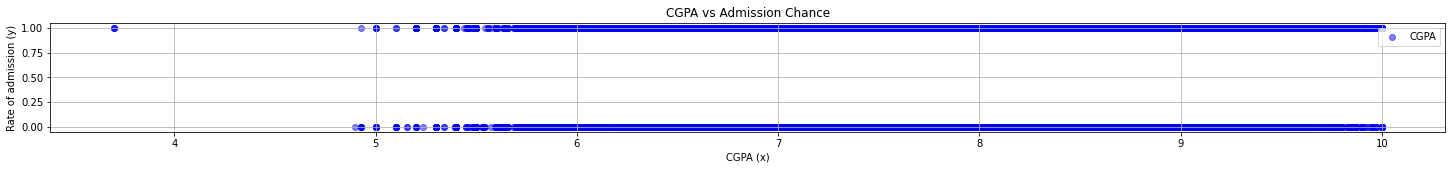

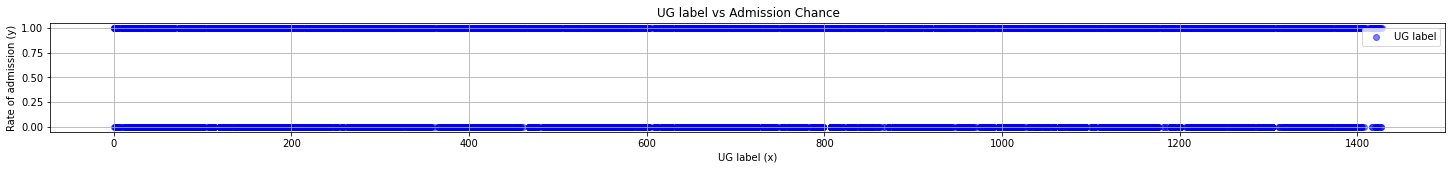

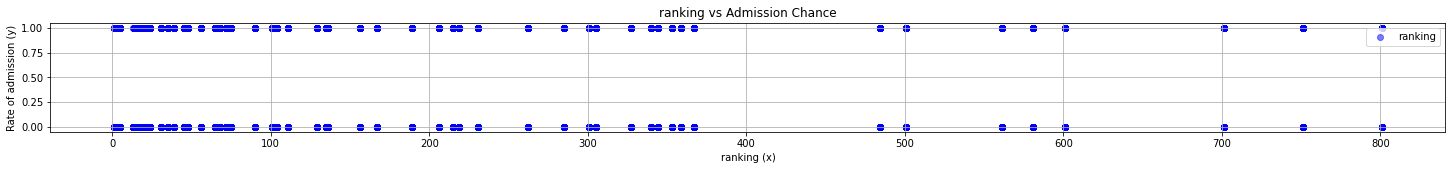

In [42]:
# To check whether a column has very uneven distribution of class of y (0 or 1) AGAIN!
for i in range(len(df.columns)):
    plt.figure(i, figsize=(25,2))
    plt.title(df.columns[i] + ' vs Admission Chance')
    plt.scatter(df.iloc[:, i], df_y, c='blue', label=df.columns[i], alpha=0.5)
    plt.xlabel(df.columns[i] + ' (x)')
    plt.ylabel('Rate of admission (y)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [43]:
df.to_csv(r'dataframe_preprocessed.csv')
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,UG label,ranking
0,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,0,751
1,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,0,129
2,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,0,601
3,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,601
4,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49591,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1401,189
49592,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1401,15
49593,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1401,129
49594,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1401,129


In [44]:
df.iloc[:,14].value_counts().sort_values(ascending=False).head(20)

285    3123
501    2976
215    2846
167    2091
340    2084
189    1923
72     1767
344    1762
129    1743
231    1680
359    1418
262    1326
48     1210
581    1192
156    1131
90     1045
561     980
301     959
111     944
136     942
Name: ranking, dtype: int64

(47519, 16)


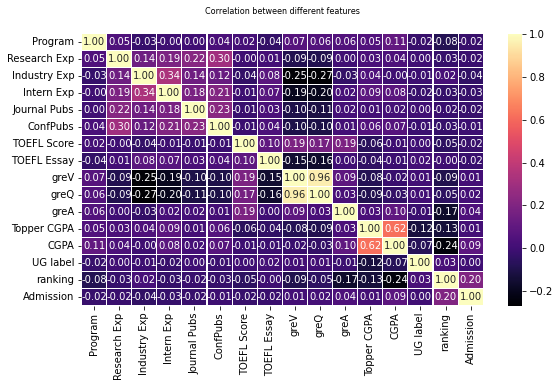

In [45]:
df['Admission'] = df_y

print(df.shape)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Correlation between different features', fontsize=8)
ax.title.set_position([0.5, 1.05])
# ax.axis('off')
seaborn.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt='.2f',cmap="magma")
plt.show()

In [46]:
df = shuffle(df)
df.reset_index(inplace=True)
df_y = df['Admission']
df = df.drop(columns=['index', 'Admission'])
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,UG label,ranking
0,0,0,0,0.0,0.0,0.0,108.0,0.0,440.0,700.0,4.0,9.00,7.600,899,301
1,0,0,0,0.0,0.0,0.0,96.0,26.0,142.0,158.0,3.0,9.00,7.500,1348,581
2,0,0,0,0.0,0.0,0.0,110.0,0.0,580.0,780.0,4.0,9.00,7.182,469,167
3,0,0,0,0.0,0.0,0.0,105.0,0.0,620.0,800.0,4.5,10.00,9.670,83,72
4,0,0,0,0.0,0.0,0.0,109.0,0.0,151.0,159.0,3.0,9.00,6.450,645,701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47514,0,0,0,0.0,0.0,0.0,92.0,0.0,149.0,162.0,3.0,10.00,8.650,645,167
47515,0,0,0,0.0,0.0,0.0,115.0,0.0,158.0,170.0,4.0,9.55,8.940,642,14
47516,0,0,0,0.0,0.0,0.0,117.0,0.0,690.0,800.0,6.0,8.40,7.400,1348,111
47517,0,0,36,1.0,1.0,0.0,105.0,0.0,152.0,154.0,3.5,7.80,7.200,202,344


In [47]:
df.replace([np.inf, -np.inf], np.nan).dropna()

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,UG label,ranking
0,0,0,0,0.0,0.0,0.0,108.0,0.0,440.0,700.0,4.0,9.00,7.600,899,301
1,0,0,0,0.0,0.0,0.0,96.0,26.0,142.0,158.0,3.0,9.00,7.500,1348,581
2,0,0,0,0.0,0.0,0.0,110.0,0.0,580.0,780.0,4.0,9.00,7.182,469,167
3,0,0,0,0.0,0.0,0.0,105.0,0.0,620.0,800.0,4.5,10.00,9.670,83,72
4,0,0,0,0.0,0.0,0.0,109.0,0.0,151.0,159.0,3.0,9.00,6.450,645,701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47514,0,0,0,0.0,0.0,0.0,92.0,0.0,149.0,162.0,3.0,10.00,8.650,645,167
47515,0,0,0,0.0,0.0,0.0,115.0,0.0,158.0,170.0,4.0,9.55,8.940,642,14
47516,0,0,0,0.0,0.0,0.0,117.0,0.0,690.0,800.0,6.0,8.40,7.400,1348,111
47517,0,0,36,1.0,1.0,0.0,105.0,0.0,152.0,154.0,3.5,7.80,7.200,202,344


In [48]:
l = len(df)

dfa = np.array(df[:(l//5)])
dfb = np.array(df[(l//5):(l*2)//5])
dfc = np.array(df[((2*l)//5):(l*3)//5])
dfd = np.array(df[((3*l)//5):(l*4)//5])
dfe = np.array(df[((4*l)//5):])

df_ya = np.array(df_y[:(l//5)])
df_yb = np.array(df_y[(l//5):(l*2)//5])
df_yc = np.array(df_y[((2*l)//5):(l*3)//5])
df_yd = np.array(df_y[((3*l)//5):(l*4)//5])
df_ye = np.array(df_y[((4*l)//5):])

dfbcde = np.concatenate((dfb,dfc,dfd,dfe))
dfacde = np.concatenate((dfa,dfc,dfd,dfe))
dfabde = np.concatenate((dfa,dfb,dfd,dfe))
dfabce = np.concatenate((dfa,dfb,dfc,dfe))
dfabcd = np.concatenate((dfa,dfb,dfc,dfd))

df_ybcde = np.concatenate((df_yb,df_yc,df_yd,df_ye))
df_yacde = np.concatenate((df_ya,df_yc,df_yd,df_ye))
df_yabde = np.concatenate((df_ya,df_yb,df_yd,df_ye))
df_yabce = np.concatenate((df_ya,df_yb,df_yc,df_ye))
df_yabcd = np.concatenate((df_ya,df_yb,df_yc,df_yd))

df_n = [dfbcde, dfacde, dfabde, dfabce, dfabcd]
df_y_n = [df_ybcde, df_yacde, df_yabde, df_yabce, df_yabcd]

In [49]:
print(len(dfa), len(dfb), len(dfc), len(dfd), len(dfe))
print(len(df_ya), len(df_yb), len(df_yc), len(df_yd), len(df_ye))
print(len(dfbcde), len(dfacde), len(dfabde), len(dfabce), len(dfabcd))
print(len(df_ybcde), len(df_yacde), len(df_yabde), len(df_yabce), len(df_yabcd))

9503 9504 9504 9504 9504
9503 9504 9504 9504 9504
38016 38015 38015 38015 38015
38016 38015 38015 38015 38015


In [50]:
cd /content/drive/MyDrive/


/content/drive/MyDrive


In [51]:
# 5 folds
n_folds = 5

flag = 0
if flag == 1:
    
    knn1 = [KNeighborsClassifier(2)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        knn1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('knn1' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/knn1-'+str(n_folds), 'wb') as file:
            pickle.dump(knn1, file)
    
    
    knn2 = [KNeighborsClassifier(3)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        knn2[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('knn2' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/knn2-'+str(n_folds), 'wb') as file:
            pickle.dump(knn2, file)
    
    
    rfc1 = [RandomForestClassifier(n_estimators=10)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        rfc1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('rfc1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/rfc1-'+str(n_folds), 'wb') as file:
            pickle.dump(rfc1, file)
    
    
    rfc2 = [RandomForestClassifier(n_estimators=15)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        rfc2[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('rfc2' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/rfc2-'+str(n_folds), 'wb') as file:
            pickle.dump(rfc2, file)
    
    
    rfc3 = [RandomForestClassifier(n_estimators=1000)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        rfc3[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('rfc3' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/rfc3-'+str(n_folds), 'wb') as file:
            pickle.dump(rfc3, file)
    
    
    mlp1 = [MLPClassifier(alpha=0.5, max_iter=1000)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        mlp1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('mlp1' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/mlp1-'+str(n_folds), 'wb') as file:
            pickle.dump(mlp1, file)
    
    
    mlp2 = [MLPClassifier(alpha=0.5, max_iter=2000)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        mlp2[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('mlp2' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/mlp2-'+str(n_folds), 'wb') as file:
            pickle.dump(mlp2, file)
    
    
    logr1 = [LogisticRegression(penalty='l2',tol=0.01)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        logr1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('logr1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/logr1-'+str(n_folds), 'wb') as file:
            pickle.dump(logr1, file)

    
    logr2 = [LogisticRegression(penalty='l2',tol=0.01)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        logr2[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('logr2' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/logr2-'+str(n_folds), 'wb') as file:
            pickle.dump(logr2, file)


    bnb1 = [BernoulliNB()]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        bnb1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('bnb1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/bnb1-'+str(n_folds), 'wb') as file:
        pickle.dump(bnb1, file)
    
    
    cnb1 = [ComplementNB()]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        cnb1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('cnb1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/cnb1-'+str(n_folds), 'wb') as file:
        pickle.dump(cnb1, file)

        
    gnb1 = [GaussianNB()]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        gnb1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('gnb1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/gnb1-'+str(n_folds), 'wb') as file:
        pickle.dump(gnb1, file)
        

    mnb1 = [MultinomialNB()]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        mnb1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('mnb1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/mnb1-'+str(n_folds), 'wb') as file:
        pickle.dump(mnb1, file)


    svm1 = [svm.SVC(kernel='poly', degree=1)]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        svm1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('svm1' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/svm1-'+str(n_folds), 'wb') as file:
        pickle.dump(svm1, file)
    
    
#     svm2 = [svm.SVC(kernel='poly', degree=2)]*(n_folds)
#     for i in range(n_folds):
#         start = time.time()
#         svm2[i].fit(df_n[i],df_y_n[i])
#         end = time.time()
#         print('svm2'+str(i+1)+' - Total Time: %.4f s' % (end-start))
#     with open('pickle-files/svm2-'+str(n_folds), 'wb') as file:
#             pickle.dump(svm2, file)
    
    
#     svm3 = [svm.SVC(kernel='poly', degree=3)]*(n_folds)
#     for i in range(n_folds):
#         start = time.time()
#         svm3[i].fit(df_n[i],df_y_n[i])
#         end = time.time()
#         print('svm3'+str(n_folds)+' - Total Time: %.4f s' % (end-start))
#     with open('pickle-files/svm3-'+str(n_folds), 'wb') as file:
#             pickle.dump(svm3, file)


#     svm4 = [svm.SVC(kernel='poly', degree=4)]*(n_folds)
#     for i in range(n_folds):
#         start = time.time()
#         svm4[i].fit(df_n[i],df_y_n[i])
#         end = time.time()
#         print('svm4'+str(n_folds)+' - Total Time: %.4f s' % (end-start))
#     with open('pickle-files/svm4-'+str(n_folds), 'wb') as file:
#             pickle.dump(svm4, file)
    
    
    svm5 = [svm.SVC(kernel='rbf', gamma='scale')]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        svm5[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('svm5'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('/content/drive/MyDrive/pickle-files/svm5-'+str(n_folds), 'wb') as file:
            pickle.dump(svm5, file)
    
    
   # svm6 = [svm.SVC(kernel='linear')]*(n_folds)
   # for i in range(n_folds):
       # start = time.time()
       # svm6[i].fit(df_n[i],df_y_n[i]) 
       # end = time.time()
       # print('svm6'+str(i+1)+' - Total Time: %.4f s' % (end-start))
   # with open('/content/drive/MyDrive/pickle-files/svm6-'+str(n_folds), 'wb') as file:
        #pickle.dump(svm6, file) 

elif flag == 0:
    with open('/content/drive/MyDrive/pickle-files/svm1-'+str(n_folds), 'rb') as file:
        svm1 = pickle.load(file)    
#     with open('pickle-files/svm2-'+str(n_folds), 'rb') as file:
#         svm2 = pickle.load(file)
#     with open('pickle-files/svm3-'+str(n_folds), 'rb') as file:
#         svm3 = pickle.load(file)
#     with open('pickle-files/svm4-'+str(n_folds), 'rb') as file:
#         svm4 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/svm5-'+str(n_folds), 'rb') as file:
        svm5 = pickle.load(file)
#   with open('pickle-files/svm6-'+str(n_folds), 'rb') as file:
#       svm6 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/knn1-'+str(n_folds), 'rb') as file:
        knn1 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/knn2-'+str(n_folds), 'rb') as file:
        knn2 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/rfc1-'+str(n_folds), 'rb') as file:
        rfc1 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/rfc2-'+str(n_folds), 'rb') as file:
        rfc2 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/rfc3-'+str(n_folds), 'rb') as file:
        rfc3 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/mlp1-'+str(n_folds), 'rb') as file:
        mlp1 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/mlp2-'+str(n_folds), 'rb') as file:
        mlp2 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/logr1-'+str(n_folds), 'rb') as file:
        logr1 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/logr2-'+str(n_folds), 'rb') as file:
        logr2 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/bnb1-'+str(n_folds), 'rb') as file:
        bnb1 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/cnb1-'+str(n_folds), 'rb') as file:
        cnb1 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/gnb1-'+str(n_folds), 'rb') as file:
        gnb1 = pickle.load(file)
    with open('/content/drive/MyDrive/pickle-files/mnb1-'+str(n_folds), 'rb') as file:
        mnb1 = pickle.load(file)

In [52]:
rfc3[1]

RandomForestClassifier(n_estimators=1000)

In [53]:
# Testing Accuracy:
        
svm1_predy = []
svm2_predy = []
svm3_predy = []
svm4_predy = []
svm5_predy = []
svm6_predy = []
knn1_predy = []
knn2_predy = []
rfc1_predy = []
rfc2_predy = []
rfc3_predy = []
mlp1_predy = []
mlp2_predy = []
logr1_predy = []
logr2_predy = []
bnb1_predy = []
cnb1_predy = []
gnb1_predy = []
mnb1_predy = []
        
for i,a in zip(range(n_folds), [dfa, dfb, dfc, dfd, dfe]):
    svm1_predy += [svm1[i].predict(a)]
#     svm2_predy += [svm2[i].predict(a)]
#     svm3_predy += [svm3[i].predict(a)]
#     svm4_predy += [svm4[i].predict(a)]
    svm5_predy += [svm5[i].predict(a)]
    #svm6_predy += [svm6[i].predict(a)]
    knn1_predy += [knn1[i].predict(a)]
    knn2_predy += [knn2[i].predict(a)]
    rfc1_predy += [rfc1[i].predict(a)]
    rfc2_predy += [rfc2[i].predict(a)]
    rfc3_predy += [rfc3[i].predict(a)]
    mlp1_predy += [mlp1[i].predict(a)]
    mlp2_predy += [mlp2[i].predict(a)]
    logr1_predy += [logr1[i].predict(a)]
    logr2_predy += [logr2[i].predict(a)]
    bnb1_predy += [bnb1[i].predict(a)]
    cnb1_predy += [cnb1[i].predict(a)]
    gnb1_predy += [gnb1[i].predict(a)]
    mnb1_predy += [mnb1[i].predict(a)]

svm1_acc = []
svm2_acc = []
svm3_acc = []
svm4_acc = []
svm5_acc = []
svm6_acc = []
knn1_acc = []
knn2_acc = []
rfc1_acc = []
rfc2_acc = []
rfc3_acc = []
mlp1_acc = []
mlp2_acc = []
logr1_acc = []
logr2_acc = []
bnb1_acc = []
cnb1_acc = []
gnb1_acc = []
mnb1_acc = []

for i,fold in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    svm1_acc += [accuracy_score(fold, svm1_predy[i])]
#     svm2_acc += [accuracy_score(fold, svm2_predy[i])]
#     svm3_acc += [accuracy_score(fold, svm3_predy[i])]
#     svm4_acc += [accuracy_score(fold, svm4_predy[i])]
    svm5_acc += [accuracy_score(fold, svm5_predy[i])]
  #  svm6_acc += [accuracy_score(fold, svm6_predy[i])]
    knn1_acc += [accuracy_score(fold, knn1_predy[i])]
    knn2_acc += [accuracy_score(fold, knn2_predy[i])]
    rfc1_acc += [accuracy_score(fold, rfc1_predy[i])]
    rfc2_acc += [accuracy_score(fold, rfc2_predy[i])]
    rfc3_acc += [accuracy_score(fold, rfc3_predy[i])]
    mlp1_acc += [accuracy_score(fold, mlp1_predy[i])]
    mlp2_acc += [accuracy_score(fold, mlp2_predy[i])]
    logr1_acc += [accuracy_score(fold, logr1_predy[i])]
    logr2_acc += [accuracy_score(fold, logr2_predy[i])]
    bnb1_acc += [accuracy_score(fold, bnb1_predy[i])]
    cnb1_acc += [accuracy_score(fold, cnb1_predy[i])]
    gnb1_acc += [accuracy_score(fold, gnb1_predy[i])]
    mnb1_acc += [accuracy_score(fold, mnb1_predy[i])]
    
    print('SVM1'+str(i+1), svm1_acc[i])
#     print('SVM2'+str(i+1), svm2_acc[i])
#     print('SVM3'+str(i+1), svm3_acc[i])
#     print('SVM4'+str(i+1), svm4_acc[i])
    print('SVM5'+str(i+1), svm5_acc[i])
   # print('SVM6'+str(i+1), svm6_acc[i])
    print('KNN1'+str(i+1), knn1_acc[i])
    print('KNN2'+str(i+1), knn2_acc[i])
    print('RFC1'+str(i+1), rfc1_acc[i])
    print('RFC2'+str(i+1), rfc2_acc[i])
    print('RFC3'+str(i+1), rfc3_acc[i])
    print('MLP1'+str(i+1), mlp1_acc[i])
    print('MLP2'+str(i+1), mlp2_acc[i])
    print('LOGR1'+str(i+1), logr1_acc[i])
    print('LOGR2'+str(i+1), logr2_acc[i])
    print('BNB1'+str(i+1), bnb1_acc[i])
    print('CNB1'+str(i+1), cnb1_acc[i])
    print('GNB1'+str(i+1), gnb1_acc[i])
    print('MNB1'+str(i+1), mnb1_acc[i])

SVM11 0.5676102283489425
SVM51 0.584026097021993
KNN11 0.7515521414290224
KNN21 0.74902662317163
RFC11 0.9165526675786594
RFC21 0.9240239924234452
RFC31 0.9327580763969273
MLP11 0.5589813743028518
MLP21 0.5862359254972114
LOGR11 0.6025465642428707
LOGR21 0.6025465642428707
BNB11 0.5268862464484899
CNB11 0.5646637903819847
GNB11 0.5373040092602336
MNB11 0.5643481005998106
SVM12 0.5573442760942761
SVM52 0.5848063973063973
KNN12 0.7437920875420876
KNN22 0.7513678451178452
RFC12 0.9136153198653199
RFC22 0.9169823232323232
RFC32 0.9275042087542088
MLP12 0.5566077441077442
MLP22 0.5884890572390572
LOGR12 0.5989057239057239
LOGR22 0.5989057239057239
BNB12 0.5335648148148148
CNB12 0.5600799663299664
GNB12 0.5434553872053872
MNB12 0.5600799663299664
SVM13 0.5698653198653199
SVM53 0.5881734006734006
KNN13 0.7442129629629629
KNN23 0.7446338383838383
RFC13 0.9110900673400674
RFC23 0.9183501683501684
RFC33 0.9251893939393939
MLP13 0.5670244107744108
MLP23 0.5964856902356902
LOGR13 0.603745791245791

In [54]:
arr = [svm1_predy, svm2_predy, svm3_predy, svm4_predy, svm5_predy, svm6_predy, knn1_predy, knn2_predy, rfc1_predy, rfc2_predy, rfc3_predy, mlp1_predy, mlp2_predy, logr1_predy, logr2_predy, bnb1_predy, cnb1_predy, gnb1_predy, mnb1_predy]
with open('pickle-files/testing_predy', 'wb') as file:
    pickle.dump(arr, file)

In [55]:
# Training Accuracy:

svm1_predy_train = []
svm2_predy_train = []
svm3_predy_train = []
svm4_predy_train = []
svm5_predy_train = []
svm6_predy_train = []
knn1_predy_train = []
knn2_predy_train = []
rfc1_predy_train = []
rfc2_predy_train = []
rfc3_predy_train = []
mlp1_predy_train = []
mlp2_predy_train = []
logr1_predy_train = []
logr2_predy_train = []
bnb1_predy_train = []
cnb1_predy_train = []
gnb1_predy_train = []
mnb1_predy_train = []

for i in range(n_folds):
    svm1_predy_train += [svm1[i].predict(df_n[i])]
#     svm2_predy_train += [svm2[i].predict(df_n[i])]
#     svm3_predy_train += [svm3[i].predict(df_n[i])]
#     svm4_predy_train += [svm4[i].predict(df_n[i])]
    svm5_predy_train += [svm5[i].predict(df_n[i])]
 #   svm6_predy_train += [svm6[i].predict(df_n[i])]
    knn1_predy_train += [knn1[i].predict(df_n[i])]
    knn2_predy_train += [knn2[i].predict(df_n[i])]
    rfc1_predy_train += [rfc1[i].predict(df_n[i])]
    rfc2_predy_train += [rfc2[i].predict(df_n[i])]
    rfc3_predy_train += [rfc3[i].predict(df_n[i])]
    mlp1_predy_train += [mlp1[i].predict(df_n[i])]
    mlp2_predy_train += [mlp2[i].predict(df_n[i])]
    logr1_predy_train += [logr1[i].predict(df_n[i])]
    logr2_predy_train += [logr2[i].predict(df_n[i])]
    bnb1_predy_train += [bnb1[i].predict(df_n[i])]
    cnb1_predy_train += [cnb1[i].predict(df_n[i])]
    gnb1_predy_train += [gnb1[i].predict(df_n[i])]
    mnb1_predy_train += [mnb1[i].predict(df_n[i])]

svm1_acc_train = []
svm2_acc_train = []
svm3_acc_train = []
svm4_acc_train = []
svm5_acc_train = []
svm6_acc_train = []
knn1_acc_train = []
knn2_acc_train = []
rfc1_acc_train = []
rfc2_acc_train = []
rfc3_acc_train = []
mlp1_acc_train = []
mlp2_acc_train = []
logr1_acc_train = []
logr2_acc_train = []
bnb1_acc_train = []
cnb1_acc_train = []
gnb1_acc_train = []
mnb1_acc_train = []

for i in range(n_folds):
    svm1_acc_train += [accuracy_score(df_y_n[i], svm1_predy_train[i])]
#     svm2_acc_train += [accuracy_score(df_y_n[i], svm2_predy_train[i])]
#     svm3_acc_train += [accuracy_score(df_y_n[i], svm3_predy_train[i])]
#     svm4_acc_train += [accuracy_score(df_y_n[i], svm4_predy_train[i])]
    svm5_acc_train += [accuracy_score(df_y_n[i], svm5_predy_train[i])]
 #   svm6_acc_train += [accuracy_score(df_y_n[i], svm6_predy_train[i])]
    knn1_acc_train += [accuracy_score(df_y_n[i], knn1_predy_train[i])]
    knn2_acc_train += [accuracy_score(df_y_n[i], knn2_predy_train[i])]
    rfc1_acc_train += [accuracy_score(df_y_n[i], rfc1_predy_train[i])]
    rfc2_acc_train += [accuracy_score(df_y_n[i], rfc2_predy_train[i])]
    rfc3_acc_train += [accuracy_score(df_y_n[i], rfc3_predy_train[i])]
    mlp1_acc_train += [accuracy_score(df_y_n[i], mlp1_predy_train[i])]
    mlp2_acc_train += [accuracy_score(df_y_n[i], mlp2_predy_train[i])]
    logr1_acc_train += [accuracy_score(df_y_n[i], logr1_predy_train[i])]
    logr2_acc_train += [accuracy_score(df_y_n[i], logr2_predy_train[i])]
    bnb1_acc_train += [accuracy_score(df_y_n[i], bnb1_predy_train[i])]
    cnb1_acc_train += [accuracy_score(df_y_n[i], cnb1_predy_train[i])]
    gnb1_acc_train += [accuracy_score(df_y_n[i], gnb1_predy_train[i])]
    mnb1_acc_train += [accuracy_score(df_y_n[i], mnb1_predy_train[i])]
    
    
    print('SVM1'+str(i+1), svm1_acc_train[i])
#     print('SVM2'+str(i+1), svm2_acc_train[i])
#     print('SVM3'+str(i+1), svm3_acc_train[i])
#     print('SVM4'+str(i+1), svm4_acc_train[i])
    print('SVM5'+str(i+1), svm5_acc_train[i])
#    print('SVM6'+str(i+1), svm6_acc_train[i])
    print('KNN1'+str(i+1), knn1_acc_train[i])
    print('KNN2'+str(i+1), knn2_acc_train[i])
    print('RFC1'+str(i+1), rfc1_acc_train[i])
    print('RFC2'+str(i+1), rfc2_acc_train[i])
    print('RFC3'+str(i+1), rfc3_acc_train[i])
    print('MLP1'+str(i+1), mlp1_acc_train[i])
    print('MLP2'+str(i+1), mlp2_acc_train[i])
    print('LOGR1'+str(i+1), logr1_acc_train[i])
    print('LOGR2'+str(i+1), logr2_acc_train[i])
    print('BNB1'+str(i+1), bnb1_acc_train[i])
    print('CNB1'+str(i+1), cnb1_acc_train[i])
    print('GNB1'+str(i+1), gnb1_acc_train[i])
    print('MNB1'+str(i+1), mnb1_acc_train[i])

SVM11 0.5635784932659933
SVM51 0.5855166245791246
KNN11 0.7456597222222222
KNN21 0.7493949915824916
RFC11 0.9134048821548821
RFC21 0.9188499579124579
RFC31 0.9277409511784511
MLP11 0.5608691077441077
MLP21 0.5891729797979798
LOGR11 0.6009048821548821
LOGR21 0.6009048821548821
BNB11 0.5296717171717171
CNB11 0.5667087542087542
GNB11 0.5391677188552189
MNB11 0.5667613636363636
SVM12 0.5661449427857425
SVM52 0.5853215835854269
KNN12 0.7475996317243193
KNN22 0.74880968038932
RFC12 0.9141391555964751
RFC22 0.9206102854136525
RFC32 0.9290543206628962
MLP12 0.5614625805603052
MLP22 0.5886097593055373
LOGR12 0.601815072997501
LOGR22 0.601815072997501
BNB12 0.5280021044324609
CNB12 0.5678547941601999
GNB12 0.5376298829409444
MNB12 0.567828488754439
SVM13 0.5630145995001973
SVM53 0.5844798106010786
KNN13 0.7474944101012758
KNN23 0.7504932263580165
RFC13 0.9147704853347363
RFC23 0.9202683151387611
RFC33 0.9296330395896357
MLP13 0.5588583453899777
MLP23 0.5866105484677101
LOGR13 0.6006050243325003


In [56]:
arr = [svm1_predy_train, svm2_predy_train, svm3_predy_train, svm4_predy_train, svm5_predy_train, svm6_predy_train, knn1_predy_train, knn2_predy_train, rfc1_predy_train, rfc2_predy_train, rfc3_predy_train, mlp1_predy_train, mlp2_predy_train, logr1_predy_train, logr2_predy_train, bnb1_predy_train, cnb1_predy_train, gnb1_predy_train, mnb1_predy_train]
with open('pickle-files/training_predy', 'wb') as file:
    pickle.dump(arr, file)

In [57]:
print("Average Training Accuracy SVM1:", sum(svm1_acc_train)/n_folds)
# print("Average Training Accuracy SVM2:", sum(svm2_acc_train)/n_folds)
# print("Average Training Accuracy SVM3:", sum(svm3_acc_train)/n_folds)
# print("Average Training Accuracy SVM4:", sum(svm4_acc_train)/n_folds)
print("Average Training Accuracy SVM5:", sum(svm5_acc_train)/n_folds)
#print("Average Training Accuracy SVM6:", sum(svm6_acc_train)/n_folds)
print("Average Training Accuracy KNN1:", sum(knn1_acc_train)/n_folds)
print("Average Training Accuracy KNN2:", sum(knn2_acc_train)/n_folds)
print("Average Training Accuracy RFC1:", sum(rfc1_acc_train)/n_folds)
print("Average Training Accuracy RFC2:", sum(rfc2_acc_train)/n_folds)
print("Average Training Accuracy RFC3:", sum(rfc3_acc_train)/n_folds)
print("Average Training Accuracy MLP1:", sum(mlp1_acc_train)/n_folds)
print("Average Training Accuracy MLP2:", sum(mlp2_acc_train)/n_folds)
print("Average Training Accuracy LOGR1:", sum(logr1_acc_train)/n_folds)
print("Average Training Accuracy LOGR2:", sum(logr2_acc_train)/n_folds)
print("Average Training Accuracy BNB1:", sum(bnb1_acc_train)/n_folds)
print("Average Training Accuracy CNB1:", sum(cnb1_acc_train)/n_folds)
print("Average Training Accuracy GNB1:", sum(gnb1_acc_train)/n_folds)
print("Average Training Accuracy MNB1:", sum(mnb1_acc_train)/n_folds)

print("Average Testing Accuracy SVM1:", sum(svm1_acc)/n_folds)
# print("Average Testing Accuracy SVM2:", sum(svm2_acc)/n_folds)
# print("Average Testing Accuracy SVM3:", sum(svm3_acc)/n_folds)
# print("Average Testing Accuracy SVM4:", sum(svm4_acc)/n_folds)
print("Average Testing Accuracy SVM5:", sum(svm5_acc)/n_folds)
#print("Average Testing Accuracy SVM6:", sum(svm6_acc)/n_folds)
print("Average Testing Accuracy KNN1:", sum(knn1_acc)/n_folds)
print("Average Testing Accuracy KNN2:", sum(knn2_acc)/n_folds)
print("Average Testing Accuracy RFC1:", sum(rfc1_acc)/n_folds)
print("Average Testing Accuracy RFC2:", sum(rfc2_acc)/n_folds)
print("Average Testing Accuracy RFC3:", sum(rfc3_acc)/n_folds)
print("Average Testing Accuracy MLP1:", sum(mlp1_acc)/n_folds)
print("Average Testing Accuracy MLP2:", sum(mlp2_acc)/n_folds)
print("Average Testing Accuracy LOGR1:", sum(logr1_acc)/n_folds)
print("Average Testing Accuracy LOGR2:", sum(logr2_acc)/n_folds)
print("Average Testing Accuracy BNB1:", sum(bnb1_acc)/n_folds)
print("Average Testing Accuracy CNB1:", sum(cnb1_acc)/n_folds)
print("Average Testing Accuracy GNB1:", sum(gnb1_acc)/n_folds)
print("Average Testing Accuracy MNB1:", sum(mnb1_acc)/n_folds)

Average Training Accuracy SVM1: 0.5643847766487268
Average Training Accuracy SVM5: 0.5852185425930576
Average Training Accuracy KNN1: 0.7468381130620954
Average Training Accuracy KNN2: 0.7493213237143677
Average Training Accuracy RFC1: 0.9140343895573739
Average Training Accuracy RFC2: 0.9198846831516091
Average Training Accuracy RFC3: 0.9287442970356375
Average Training Accuracy MLP1: 0.5604915908504131
Average Training Accuracy MLP2: 0.5885856152940693
Average Training Accuracy LOGR1: 0.6012331926614118
Average Training Accuracy LOGR2: 0.6012331926614118
Average Training Accuracy BNB1: 0.5291146669908343
Average Training Accuracy CNB1: 0.5662997937195622
Average Training Accuracy GNB1: 0.538795006351604
Average Training Accuracy MNB1: 0.566278749118171
Average Testing Accuracy SVM1: 0.5643848402825832
Average Testing Accuracy SVM5: 0.5852185190676982
Average Testing Accuracy KNN1: 0.7468382060635822
Average Testing Accuracy KNN2: 0.7493213179003193
Average Testing Accuracy RFC1: 0.91

In [58]:
# F1 Scores

svm1_f1 = []
svm2_f1 = []
svm3_f1 = []
svm4_f1 = []
svm5_f1 = []
svm6_f1 = []
knn1_f1 = []
knn2_f1 = []
rfc1_f1 = []
rfc2_f1 = []
rfc3_f1 = []
mlp1_f1 = []
mlp2_f1 = []
logr1_f1 = []
logr2_f1 = []
bnb1_f1 = []
cnb1_f1 = []
gnb1_f1 = []
mnb1_f1 = []

for i,fold in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    svm1_f1 += [f1_score(fold, svm1_predy[i])]
#     svm2_f1 += [f1_score(fold, svm2_predy[i])]
#     svm3_f1 += [f1_score(fold, svm3_predy[i])]
#     svm4_f1 += [f1_score(fold, svm4_predy[i])]
    svm5_f1 += [f1_score(fold, svm5_predy[i])]
 #   svm6_f1 += [f1_score(fold, svm6_predy[i])]
    knn1_f1 += [f1_score(fold, knn1_predy[i])]
    knn2_f1 += [f1_score(fold, knn2_predy[i])]
    rfc1_f1 += [f1_score(fold, rfc1_predy[i])]
    rfc2_f1 += [f1_score(fold, rfc2_predy[i])]
    rfc3_f1 += [f1_score(fold, rfc3_predy[i])]
    mlp1_f1 += [f1_score(fold, mlp1_predy[i])]
    mlp2_f1 += [f1_score(fold, mlp2_predy[i])]
    logr1_f1 += [f1_score(fold, logr1_predy[i])]
    logr2_f1 += [f1_score(fold, logr2_predy[i])]
    bnb1_f1 += [f1_score(fold, bnb1_predy[i])]
    cnb1_f1 += [f1_score(fold, cnb1_predy[i])]
    gnb1_f1 += [f1_score(fold, gnb1_predy[i])]
    mnb1_f1 += [f1_score(fold, mnb1_predy[i])]
    
    print('SVM1'+str(i+1), svm1_f1[i])
#     print('SVM2'+str(i+1), svm2_f1[i])
#     print('SVM3'+str(i+1), svm3_f1[i])
#     print('SVM4'+str(i+1), svm4_f1[i])
    print('SVM5'+str(i+1), svm5_f1[i])
 #   print('SVM6'+str(i+1), svm6_f1[i])
    print('KNN1'+str(i+1), knn1_f1[i])
    print('KNN2'+str(i+1), knn2_f1[i])
    print('RFC1'+str(i+1), rfc1_f1[i])
    print('RFC2'+str(i+1), rfc2_f1[i])
    print('RFC3'+str(i+1), rfc3_f1[i])
    print('MLP1'+str(i+1), mlp1_f1[i])
    print('MLP2'+str(i+1), mlp1_f1[i])
    print('LOGR1'+str(i+1), logr1_f1[i])
    print('LOGR2'+str(i+1), logr2_f1[i])
    print('BNB1'+str(i+1), bnb1_f1[i])
    print('CNB1'+str(i+1), cnb1_f1[i])
    print('GNB1'+str(i+1), gnb1_f1[i])
    print('MNB1'+str(i+1), mnb1_f1[i])

SVM11 0.5135551083224814
SVM51 0.6109634878456845
KNN11 0.6920568670927352
KNN21 0.7545033453422543
RFC11 0.9162883986065661
RFC21 0.9250259605399792
RFC31 0.9337617912304342
MLP11 0.39480144404332135
MLP21 0.39480144404332135
LOGR11 0.615415945423073
LOGR21 0.615415945423073
BNB11 0.643117955230989
CNB11 0.5487073197338278
GNB11 0.6502823510697527
MNB11 0.5486262538159615
SVM12 0.5070884592852959
SVM52 0.6170419254658385
KNN12 0.6846263437378578
KNN22 0.7582608695652174
RFC12 0.9142200397032703
RFC22 0.9190520160049247
RFC32 0.9293260847266385
MLP12 0.39575566389446515
MLP22 0.39575566389446515
LOGR12 0.6174994982942003
LOGR22 0.6174994982942003
BNB12 0.6513566653558789
CNB12 0.5437083924478884
GNB12 0.6597129636891224
MNB12 0.5438079650845609
SVM13 0.5196239717978849
SVM53 0.6176240719030871
KNN13 0.6844086719459951
KNN23 0.7525237075558274
RFC13 0.9113047129211713
RFC23 0.9200659250103008
RFC33 0.9266934735539746
MLP13 0.40884930326102575
MLP23 0.40884930326102575
LOGR13 0.618285019

In [59]:
print('Average F1-Score SVM1:', sum(svm1_f1)/n_folds)
# print('Average F1-Score SVM2:', sum(svm2_f1)/n_folds)
# print('Average F1-Score SVM3:', sum(svm3_f1)/n_folds)
# print('Average F1-Score SVM4:', sum(svm4_f1)/n_folds)
print('Average F1-Score SVM5:', sum(svm5_f1)/n_folds)
#print('Average F1-Score SVM6:', sum(svm6_f1)/n_folds)
print('Average F1-Score KNN1:', sum(knn1_f1)/n_folds)
print('Average F1-Score KNN2:', sum(knn2_f1)/n_folds)
print('Average F1-Score RFC1:', sum(rfc1_f1)/n_folds)
print('Average F1-Score RFC2:', sum(rfc2_f1)/n_folds)
print('Average F1-Score RFC3:', sum(rfc3_f1)/n_folds)
print('Average F1-Score MLP1:', sum(mlp1_f1)/n_folds)
print('Average F1-Score MLP2:', sum(mlp2_f1)/n_folds)
print('Average F1-Score LOGR1:', sum(logr1_f1)/n_folds)
print('Average F1-Score LOGR2:', sum(logr2_f1)/n_folds)
print('Average F1-Score BNB1:', sum(bnb1_f1)/n_folds)
print('Average F1-Score CNB1:', sum(cnb1_f1)/n_folds)
print('Average F1-Score GNB1:', sum(gnb1_f1)/n_folds)
print('Average F1-Score MNB1:', sum(mnb1_f1)/n_folds)

Average F1-Score SVM1: 0.5116982306253629
Average F1-Score SVM5: 0.6146542565151183
Average F1-Score KNN1: 0.6879411887411979
Average F1-Score KNN2: 0.7563791902628458
Average F1-Score RFC1: 0.9142618173957828
Average F1-Score RFC2: 0.9215422549863639
Average F1-Score RFC3: 0.9302909125840166
Average F1-Score MLP1: 0.3992399769848049
Average F1-Score MLP2: 0.6555694043292072
Average F1-Score LOGR1: 0.6173512822867349
Average F1-Score LOGR2: 0.6173512822867349
Average F1-Score BNB1: 0.6463462486392564
Average F1-Score CNB1: 0.550145294576017
Average F1-Score GNB1: 0.6537188195924623
Average F1-Score MNB1: 0.5502512554288094


In [60]:
# estimators = []
# for i in range(n_folds):
# #     estimators += ('psvm', svm1[i])
# #     estimators += ('psvm', svm2[i])
# #     estimators += ('psvm', svm3[i])
# #     estimators += ('psvm', svm4[i])
#     estimators += ('rsvm', svm5[i])
# #     estimators += ('lsvm', svm6[i])
#     estimators += ('knn', knn1[i])
#     estimators += ('knn', knn2[i])
#     estimators += ('rf', rfc1[i])
#     estimators += ('rf', rfc2[i])
#     estimators += ('rf', rfc3[i])
#     estimators += ('mlp', mlp1[i])
#     estimators += ('mlp', mlp2[i])
#     estimators += ('lr', logr1[i])
#     estimators += ('lr', logr2[i])
#     estimators += ('bnb', bnb1[i])
#     estimators += ('cnb', cnb1[i])
#     estimators += ('gnb', gnb1[i])
#     estimators += ('mnb', mnb1[i])
# vclf1 = VotingClassifier(estimators=estimators,  voting='hard')
# vclf2 = VotingClassifier(estimators=estimators,  voting='soft')

# vclf1.fit()

# vclf1_pred = []
# vclf2_pred = []
# vclf1_pred_train = []
# vclf2_pred_train = []

# for i in range(n_folds):
#     vclf1_pred_train += [vclf1.predict(df_n[i])]
#     vclf2_pred_train += [vclf2.predict(df_n[i])]
# for i in [dfa, dfb, dfc, dfd, dfe]:
#     vclf1_pred += [vclf1.predict(i)]
#     vclf2_pred += [vclf2.predict(i)]
    
# for ind, i in zip(range(n_folds), [dfa, dfb, dfc, dfd, dfe]):
#     print('Hard Voting Classifier, Fold ' + str(i+1) + ' :', accuracy_score(fold, vclf1_pred[i]))
#     print('Soft Voting Classifier, Fold ' + str(i+1) + ' :', accuracy_score(fold, vclf2_pred[i]))
# for i in range(n_folds):
#     print('Hard Voting Classifier, Fold ' + str(i+1) + ' :', f1_score(df_yn[i], vclf1_pred_train[i]))
#     print('Soft Voting Classifier, Fold ' + str(i+1) + ' :', f1_score(df_yn[i], vclf2_pred_train[i]))

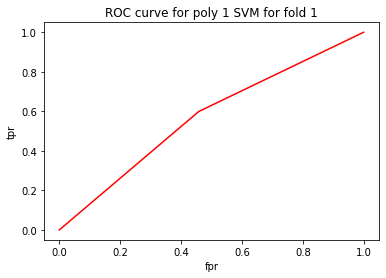

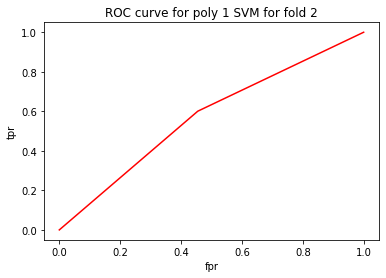

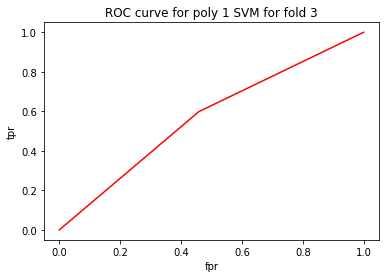

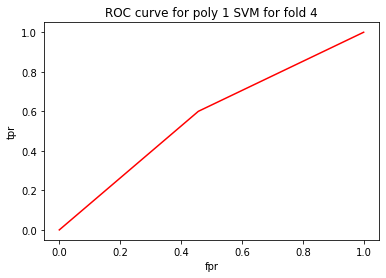

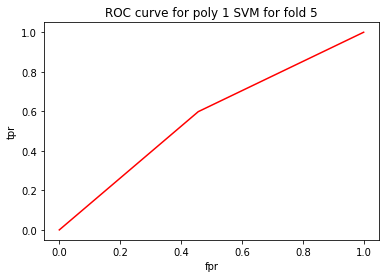

In [61]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(svm1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for poly 1 SVM for fold ' + str(i+1))
    plt.show()

In [62]:
# for i in range(n_folds):
#     fpr, tpr, _ = roc_curve(svm2_predy_train[i], df_y_n[i], drop_intermediate=False)
#     plt.plot(fpr, tpr, color='red')
#     plt.xlabel('fpr')
#     plt.ylabel('tpr')
#     plt.title('ROC curve for poly 2 SVM for fold ' + str(i+1))
#     plt.show()

In [63]:
# for i in range(n_folds):
#     fpr, tpr, _ = roc_curve(svm3_predy_train[i], df_y_n[i], drop_intermediate=False)
#     plt.plot(fpr, tpr, color='red')
#     plt.xlabel('fpr')
#     plt.ylabel('tpr')
#     plt.title('ROC curve for poly 3 SVM for fold ' + str(i+1))
#     plt.show()

In [64]:
# for i in range(n_folds):
#     fpr, tpr, _ = roc_curve(svm4_predy_train[i], df_y_n[i], drop_intermediate=False)
#     plt.plot(fpr, tpr, color='red')
#     plt.xlabel('fpr')
#     plt.ylabel('tpr')
#     plt.title('ROC curve for poly 4 SVM for fold ' + str(i+1))
#     plt.show()

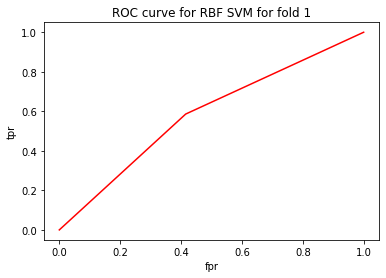

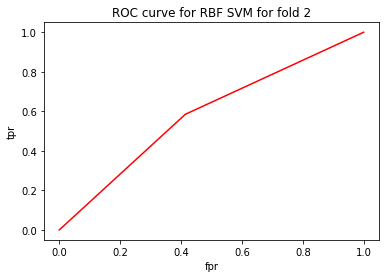

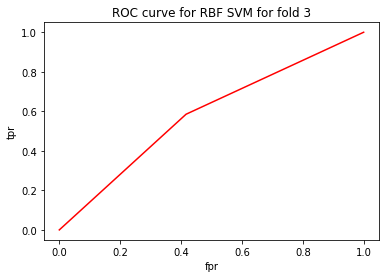

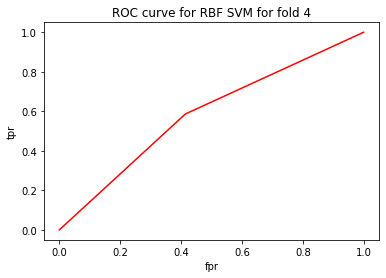

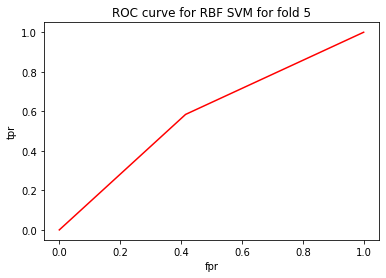

In [65]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(svm5_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for RBF SVM for fold ' + str(i+1))
    plt.show()

In [66]:
#for i in range(n_folds):
    #fpr, tpr, _ = roc_curve(svm6_predy_train[i], df_y_n[i], drop_intermediate=False)
    #plt.plot(fpr, tpr, color='red')
    #plt.xlabel('fpr')
    #plt.ylabel('tpr')
    #plt.title('ROC curve for linear SVM for fold ' + str(i+1))
    #plt.show()

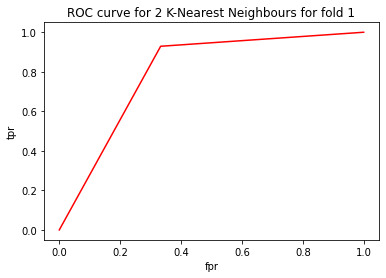

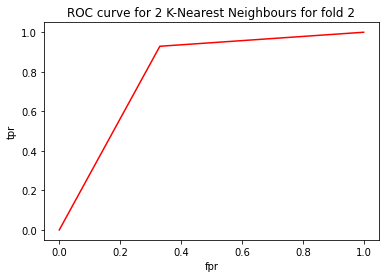

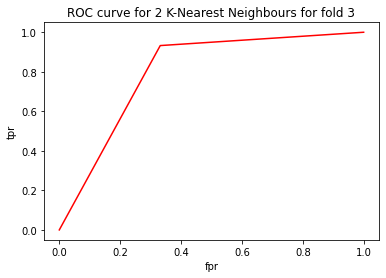

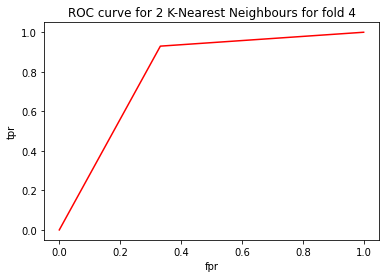

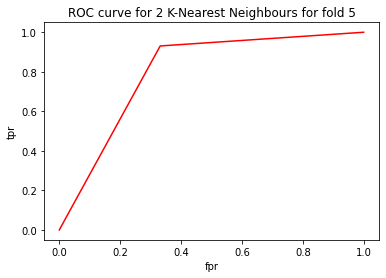

In [67]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(knn1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 2 K-Nearest Neighbours for fold ' + str(i+1))
    plt.show()

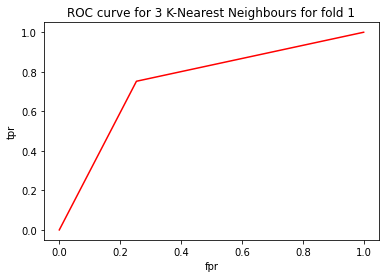

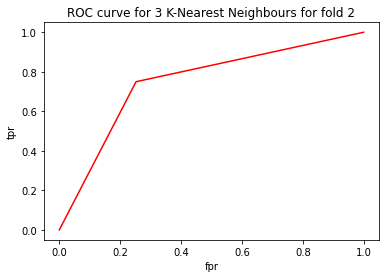

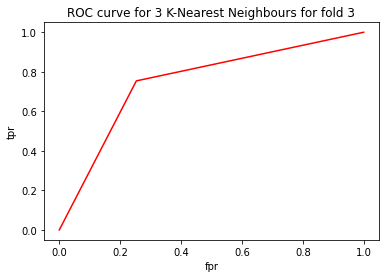

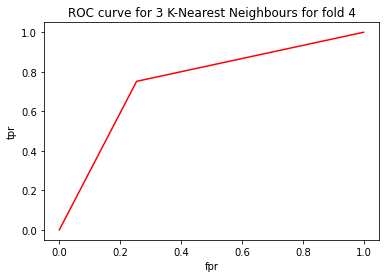

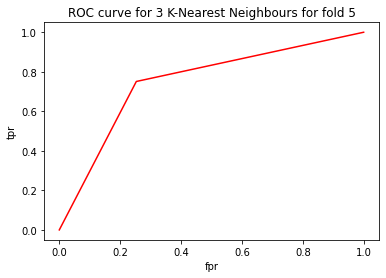

In [68]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(knn2_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 3 K-Nearest Neighbours for fold ' + str(i+1))
    plt.show()

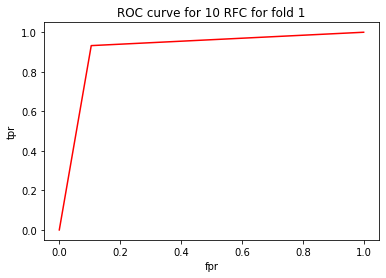

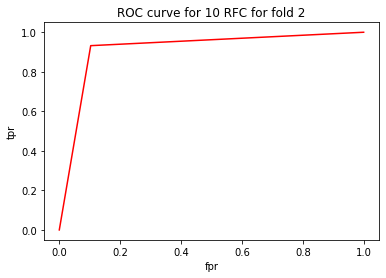

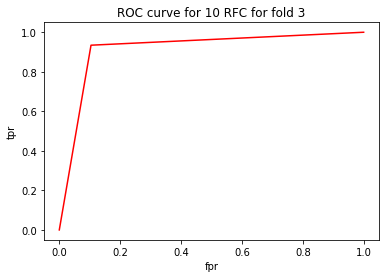

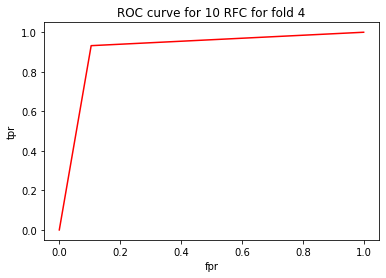

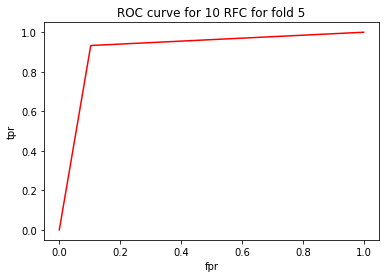

In [69]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(rfc1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 10 RFC for fold ' + str(i+1))
    plt.show()

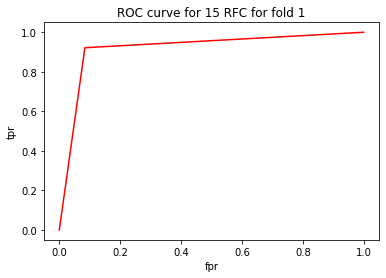

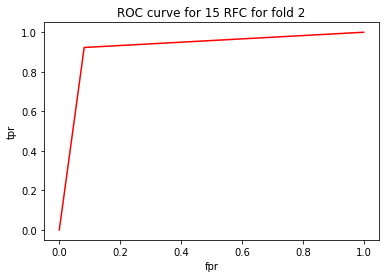

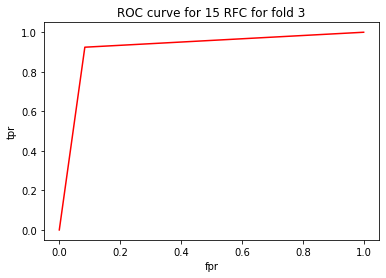

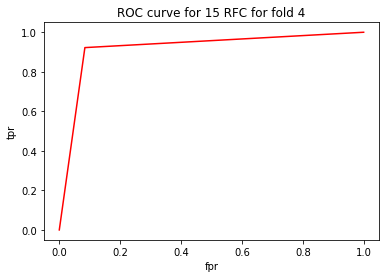

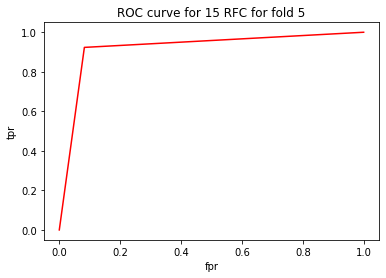

In [70]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(rfc2_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 15 RFC for fold ' + str(i+1))
    plt.show()

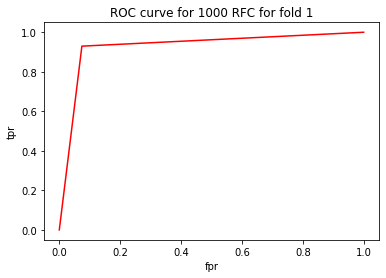

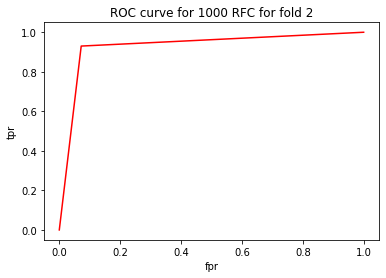

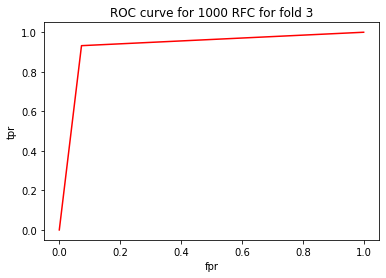

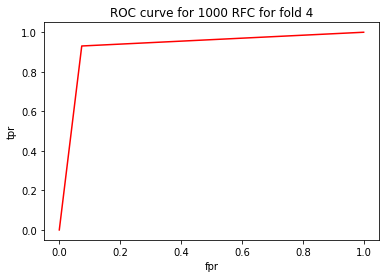

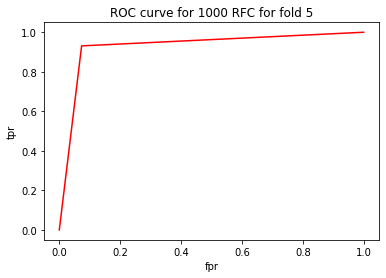

In [71]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(rfc3_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 1000 RFC for fold ' + str(i+1))
    plt.show()

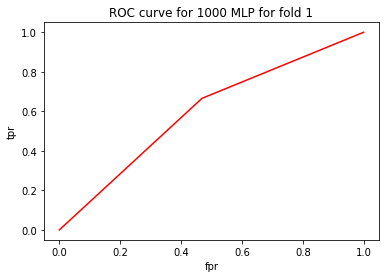

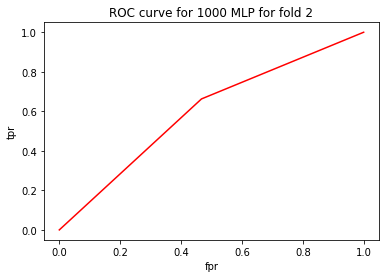

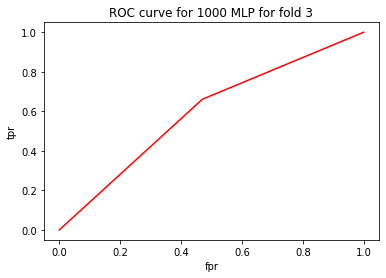

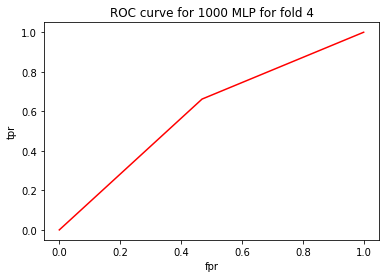

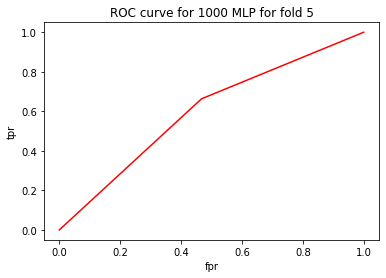

In [72]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(mlp1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 1000 MLP for fold ' + str(i+1))
    plt.show()

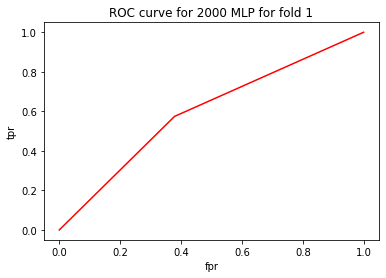

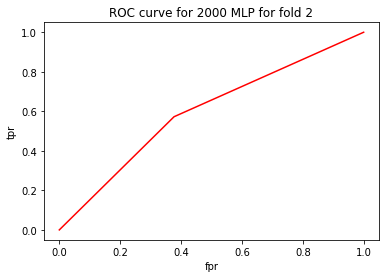

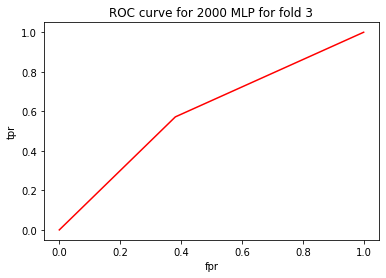

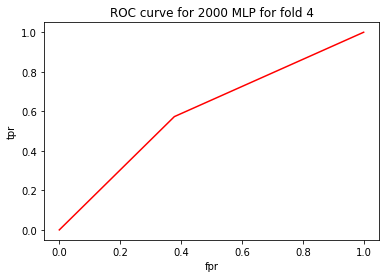

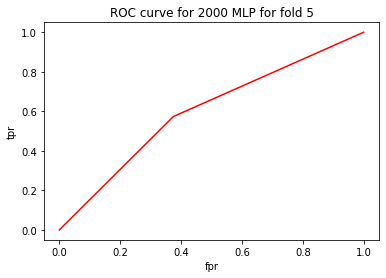

In [73]:
for i in range(n_folds):    
    fpr, tpr, _ = roc_curve(mlp2_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 2000 MLP for fold ' + str(i+1))
    plt.show()

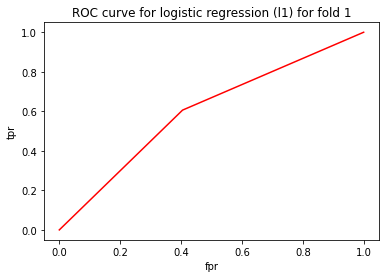

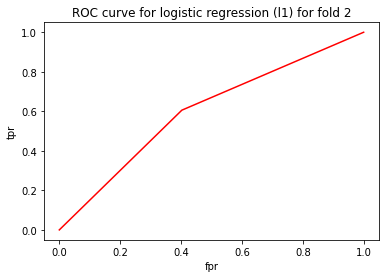

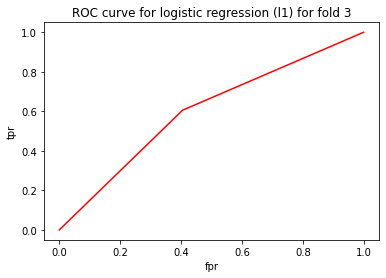

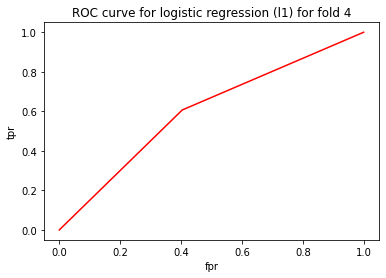

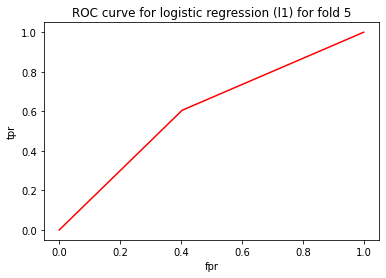

In [74]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(logr1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for logistic regression (l1) for fold ' + str(i+1))
    plt.show()

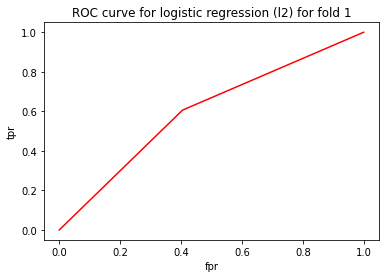

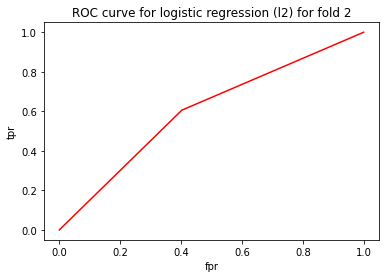

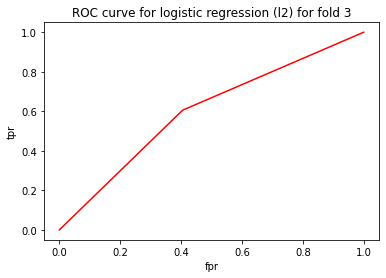

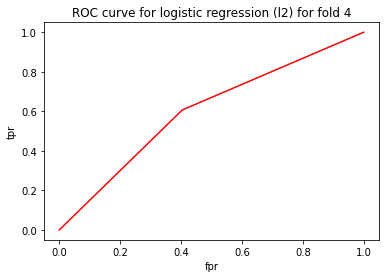

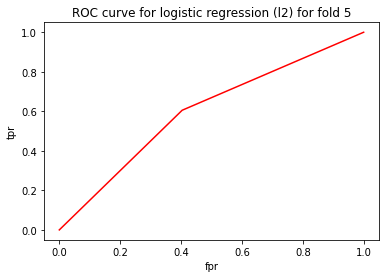

In [75]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(logr2_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for logistic regression (l2) for fold ' + str(i+1))
    plt.show()

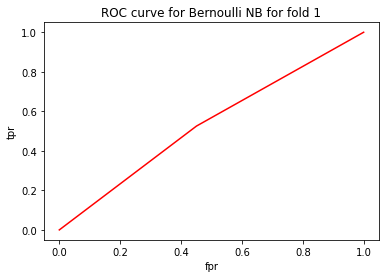

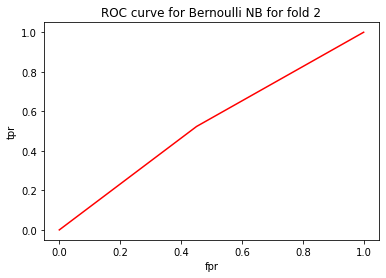

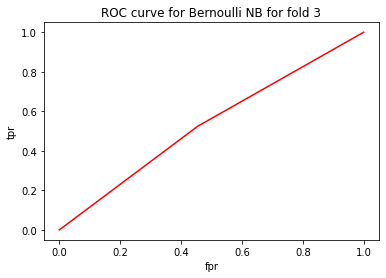

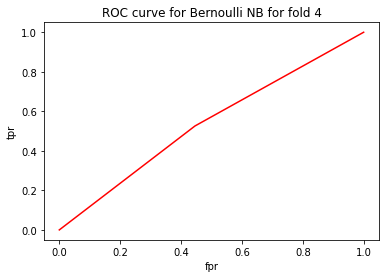

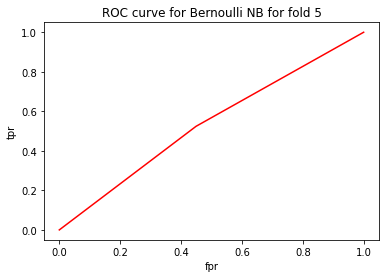

In [76]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(bnb1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for Bernoulli NB for fold ' + str(i+1))
    plt.show()

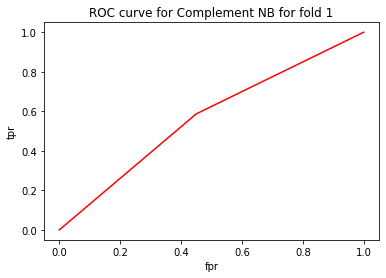

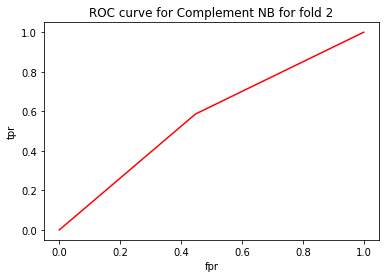

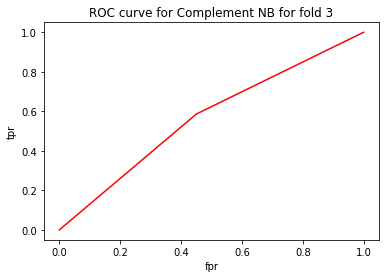

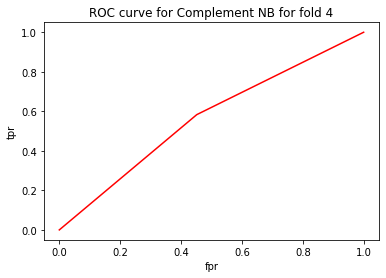

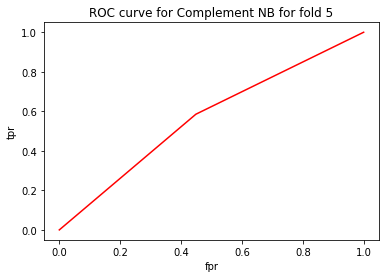

In [77]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(cnb1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for Complement NB for fold ' + str(i+1))
    plt.show()

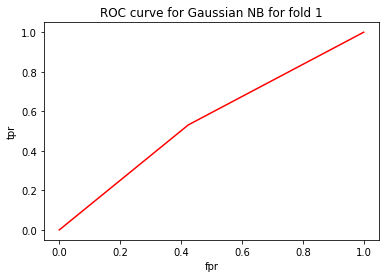

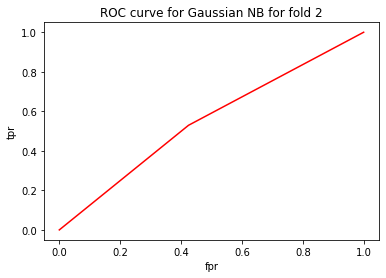

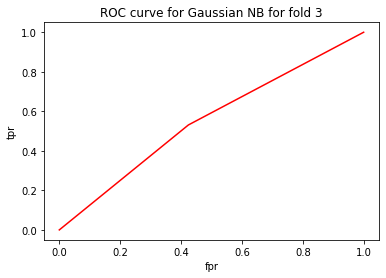

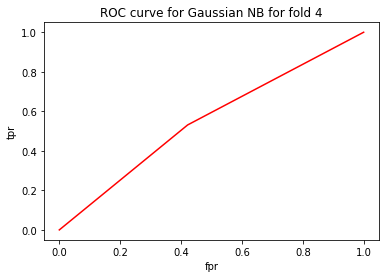

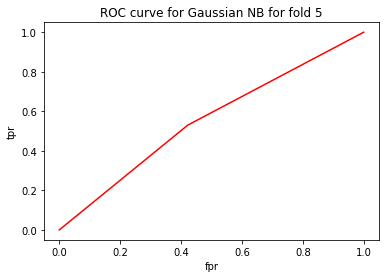

In [78]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(gnb1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for Gaussian NB for fold ' + str(i+1))
    plt.show()

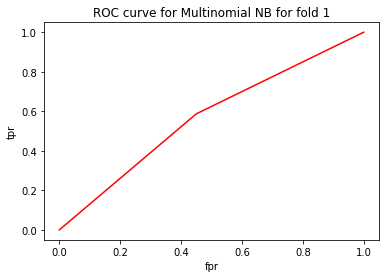

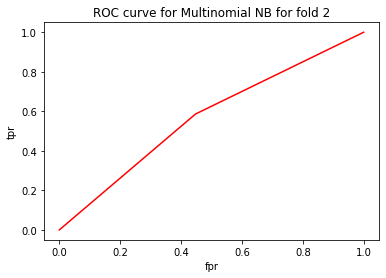

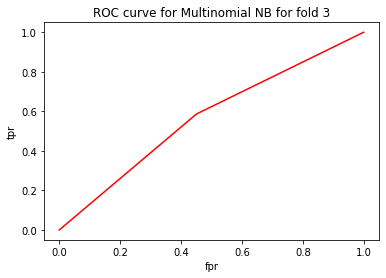

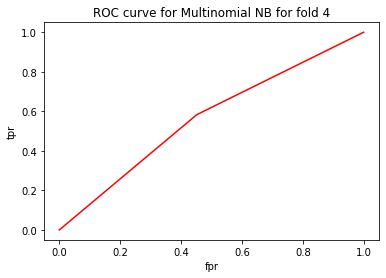

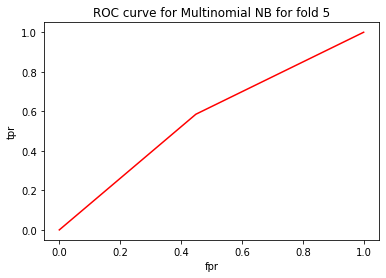

In [79]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(mnb1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for Multinomial NB for fold ' + str(i+1))
    plt.show()

In [80]:
# Testing Data Confusion Matrices:

[[3225 1449]
 [2660 2169]]
[[3133 1477]
 [2730 2164]]
[[3205 1459]
 [2629 2211]]
[[3192 1458]
 [2697 2157]]
[[3218 1408]
 [2733 2145]]


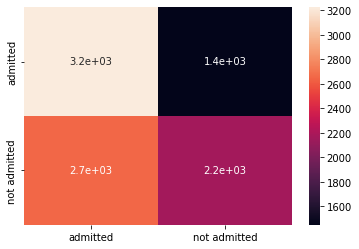

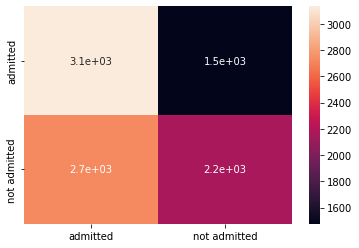

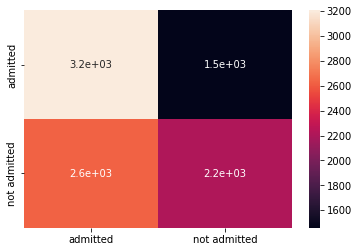

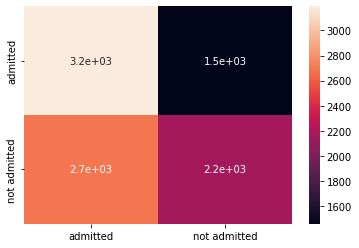

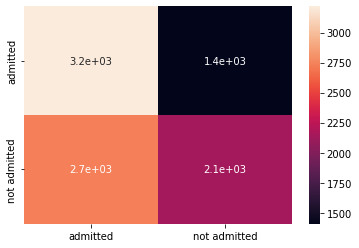

In [81]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm1 = confusion_matrix(y, svm1_predy[i])
    print(cm1)
    cm1df = pd.DataFrame(cm1, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm1df, annot=True)

In [82]:
# for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
#     fig = plt.figure(i+1)
#     cm2 = confusion_matrix(y, svm2_predy[i])
#     print(cm2)
#     cm2df = pd.DataFrame(cm2, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
#     seaborn.heatmap(cm2df, annot=True)

In [83]:
# for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
#     fig = plt.figure(i+1)
#     cm3 = confusion_matrix(y, svm3_predy[i])
#     print(cm3)
#     cm3df = pd.DataFrame(cm3, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
#     seaborn.heatmap(cm3df, annot=True)

In [84]:
# for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
#     fig = plt.figure(i+1)
#     cm4 = confu3sion_matrix(y, svm4_predy[i])
#     print(cm4)
#     cm4df = pd.DataFrame(cm4, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
#     seaborn.heatmap(cm4df, annot=True)

[[2446 2228]
 [1725 3104]]
[[2379 2231]
 [1715 3179]]
[[2429 2235]
 [1679 3161]]
[[2401 2249]
 [1728 3126]]
[[2434 2192]
 [1728 3150]]


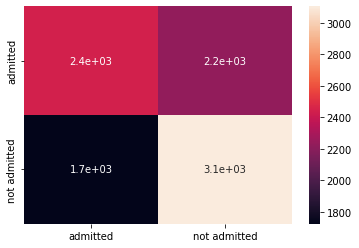

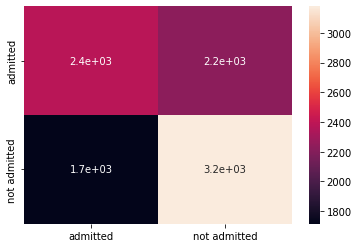

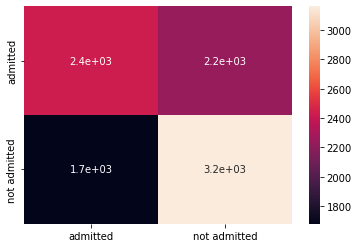

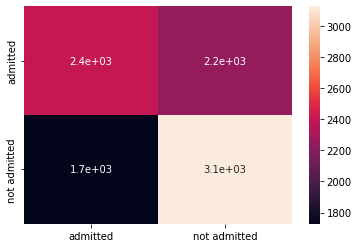

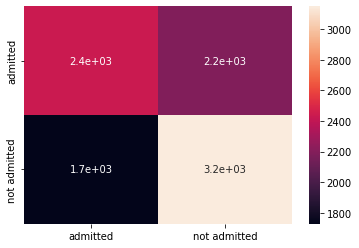

In [85]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm5 = confusion_matrix(y, svm5_predy[i])
    print(cm5)
    cm5df = pd.DataFrame(cm5, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm5df, annot=True)

In [86]:
#for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
   # fig = plt.figure(i+1)
    #cm6 = confusion_matrix(y, svm6_predy[i])
    #print(cm6)
    #cm6df = pd.DataFrame(cm6, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    #seaborn.heatmap(cm6df, annot=True)

[[4370  304]
 [ 489 4340]]
[[4308  302]
 [ 519 4375]]
[[4318  346]
 [ 499 4341]]
[[4349  301]
 [ 492 4362]]
[[4310  316]
 [ 517 4361]]


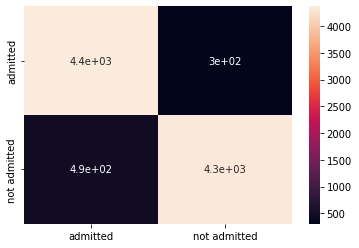

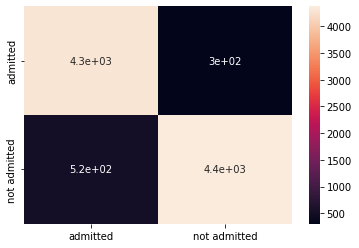

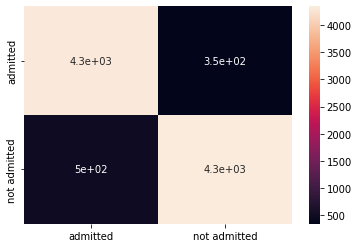

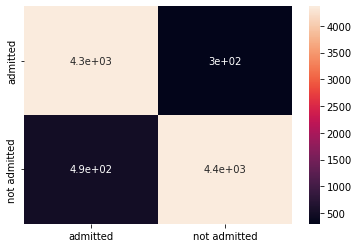

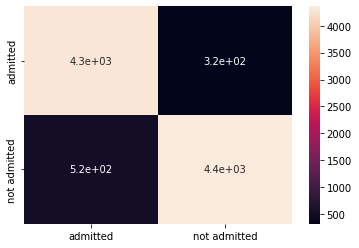

In [87]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm7 = confusion_matrix(y, rfc1_predy[i])
    print(cm7)
    cm7df = pd.DataFrame(cm7, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm7df, annot=True)

[[4327  347]
 [ 375 4454]]
[[4236  374]
 [ 415 4479]]
[[4262  402]
 [ 374 4466]]
[[4289  361]
 [ 373 4481]]
[[4243  383]
 [ 403 4475]]


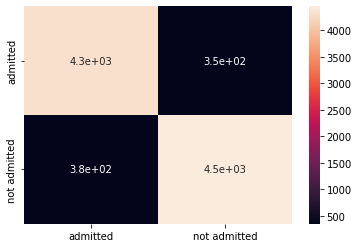

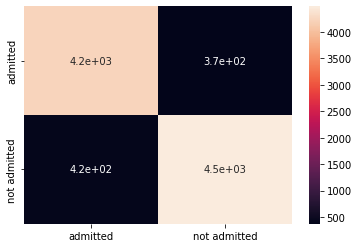

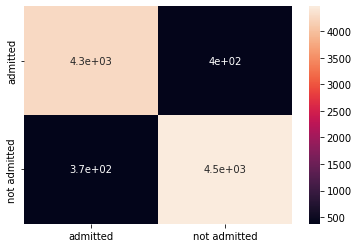

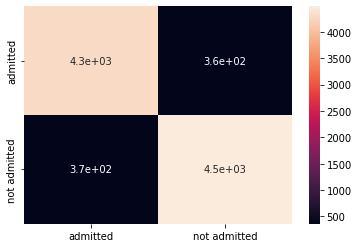

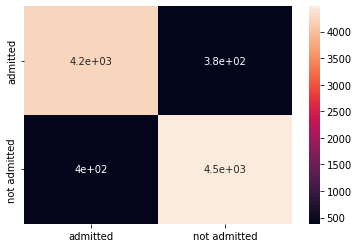

In [88]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm8 = confusion_matrix(y, rfc2_predy[i])
    print(cm8)
    cm8df = pd.DataFrame(cm8, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm8df, annot=True)

[[4360  314]
 [ 325 4504]]
[[4285  325]
 [ 364 4530]]
[[4299  365]
 [ 346 4494]]
[[4317  333]
 [ 331 4523]]
[[4280  346]
 [ 337 4541]]


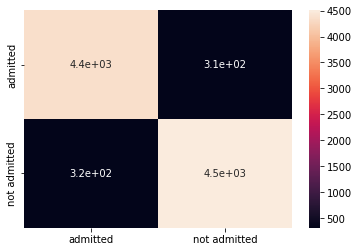

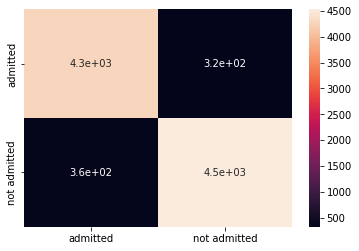

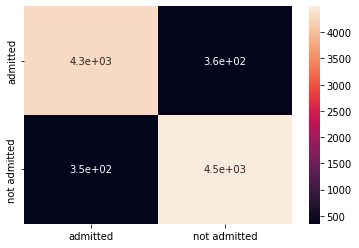

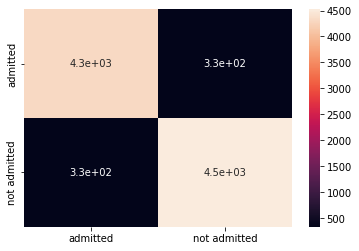

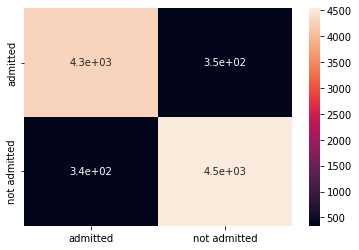

In [89]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm9 = confusion_matrix(y, rfc3_predy[i])
    print(cm9)
    cm9df = pd.DataFrame(cm9, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm9df, annot=True)

[[4489  185]
 [2176 2653]]
[[4426  184]
 [2251 2643]]
[[4437  227]
 [2204 2636]]
[[4457  193]
 [2200 2654]]
[[4420  206]
 [2204 2674]]


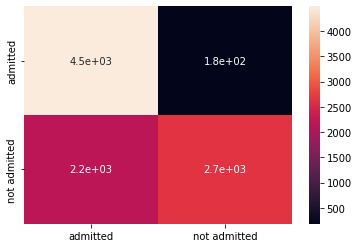

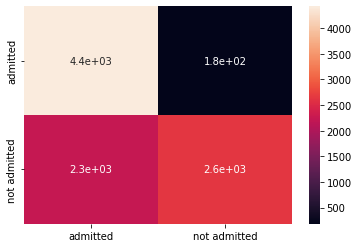

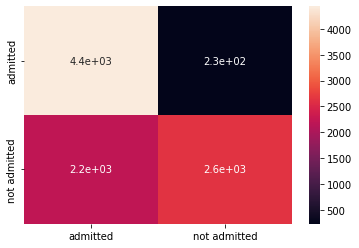

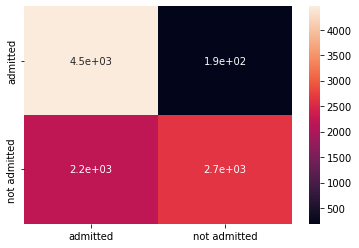

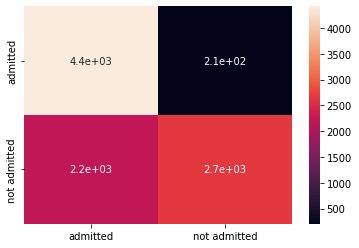

In [90]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm10 = confusion_matrix(y, knn1_predy[i])
    print(cm10)
    cm10df = pd.DataFrame(cm10, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm10df, annot=True)

[[3453 1221]
 [1164 3665]]
[[3435 1175]
 [1188 3706]]
[[3387 1277]
 [1150 3690]]
[[3423 1227]
 [1140 3714]]
[[3417 1209]
 [1161 3717]]


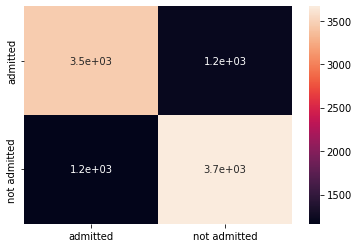

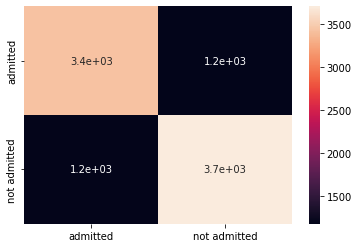

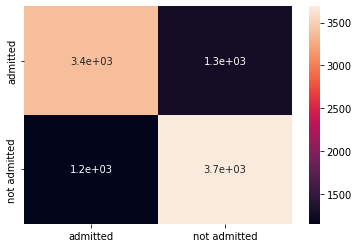

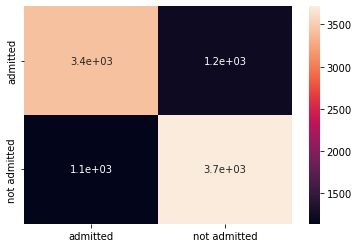

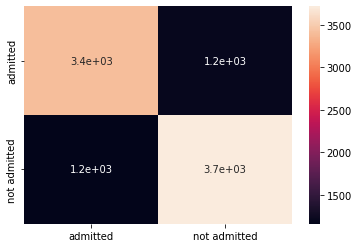

In [91]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm11 = confusion_matrix(y, knn2_predy[i])
    print(cm11)
    cm11df = pd.DataFrame(cm11, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm11df, annot=True)

[[3945  729]
 [3462 1367]]
[[3910  700]
 [3514 1380]]
[[3966  698]
 [3417 1423]]
[[3943  707]
 [3441 1413]]
[[3930  696]
 [3521 1357]]


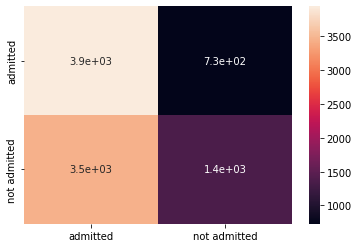

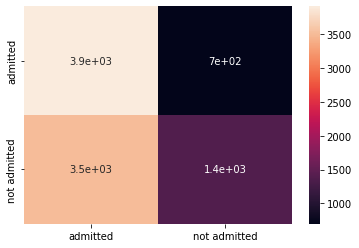

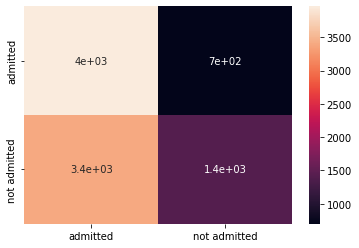

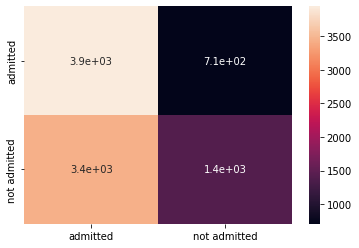

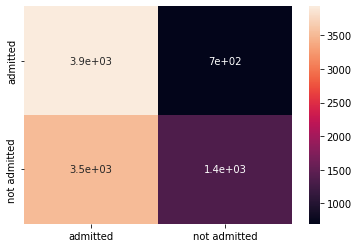

In [92]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm12 = confusion_matrix(y, mlp1_predy[i])
    print(cm12)
    cm12df = pd.DataFrame(cm12, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm12df, annot=True)

[[1860 2814]
 [1118 3711]]
[[1828 2782]
 [1129 3765]]
[[1950 2714]
 [1121 3719]]
[[1881 2769]
 [1142 3712]]
[[1845 2781]
 [1180 3698]]


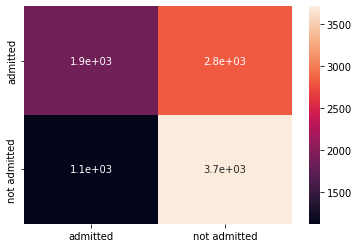

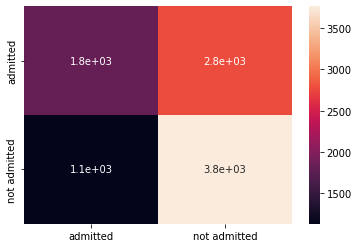

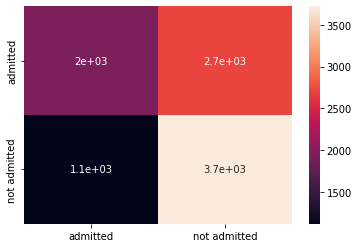

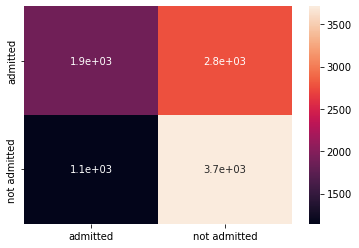

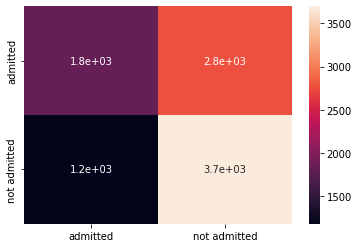

In [93]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm13 = confusion_matrix(y, mlp2_predy[i])
    print(cm13)
    cm13df = pd.DataFrame(cm13, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm13df, annot=True)

[[2704 1970]
 [1807 3022]]
[[2615 1995]
 [1817 3077]]
[[2688 1976]
 [1790 3050]]
[[2629 2021]
 [1787 3067]]
[[2648 1978]
 [1808 3070]]


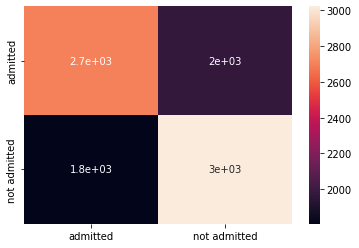

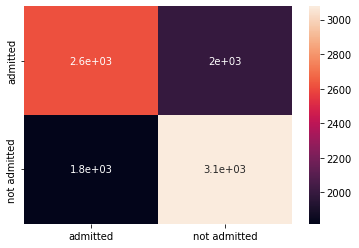

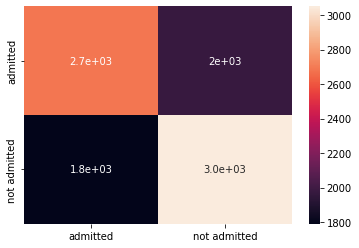

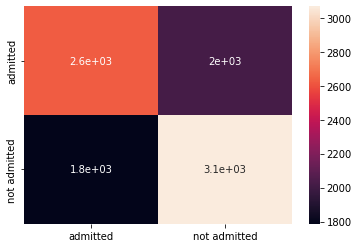

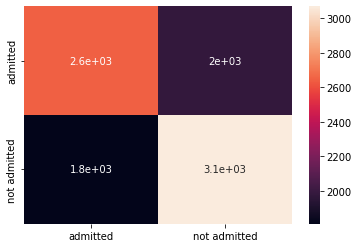

In [94]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm14 = confusion_matrix(y, logr1_predy[i])
    print(cm14)
    cm14df = pd.DataFrame(cm14, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm14df, annot=True)

[[2704 1970]
 [1807 3022]]
[[2615 1995]
 [1817 3077]]
[[2688 1976]
 [1790 3050]]
[[2629 2021]
 [1787 3067]]
[[2648 1978]
 [1808 3070]]


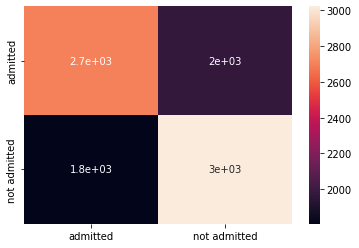

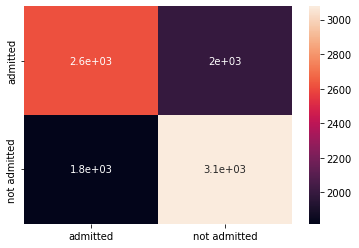

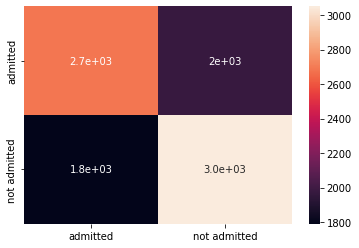

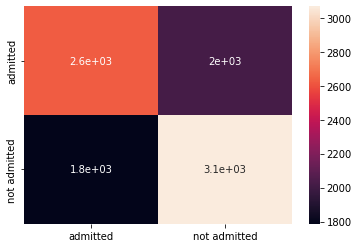

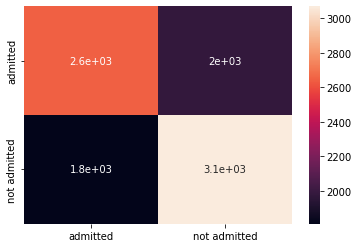

In [95]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm15 = confusion_matrix(y, logr2_predy[i])
    print(cm15)
    cm15df = pd.DataFrame(cm15, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm15df, annot=True)

[[ 956 3718]
 [ 778 4051]]
[[ 930 3680]
 [ 753 4141]]
[[ 964 3700]
 [ 735 4105]]
[[ 897 3753]
 [ 792 4062]]
[[ 948 3678]
 [ 789 4089]]


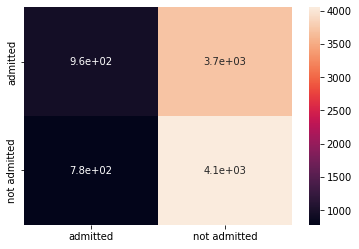

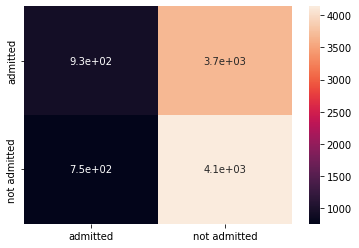

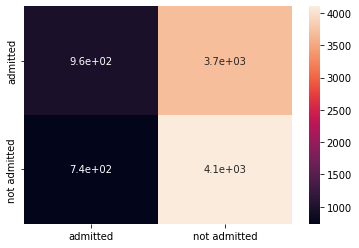

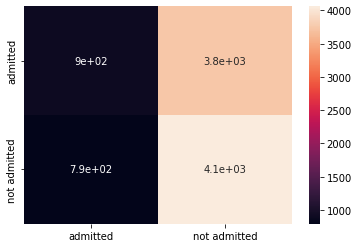

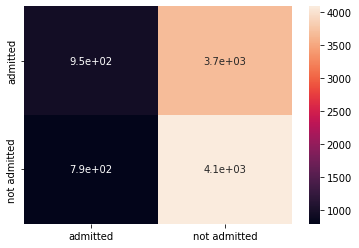

In [96]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm16 = confusion_matrix(y, bnb1_predy[i])
    print(cm16)
    cm16df = pd.DataFrame(cm16, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm16df, annot=True)

[[2851 1823]
 [2314 2515]]
[[2832 1778]
 [2403 2491]]
[[2826 1838]
 [2275 2565]]
[[2927 1723]
 [2317 2537]]
[[2872 1754]
 [2384 2494]]


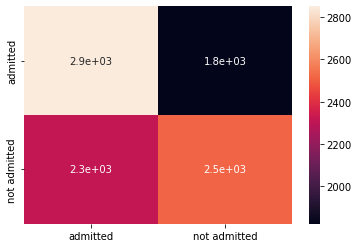

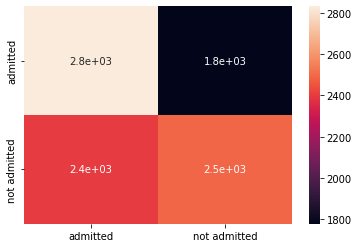

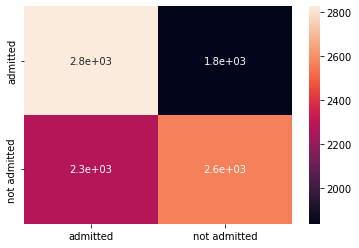

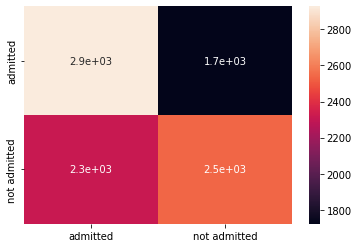

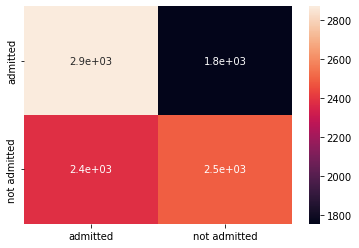

In [97]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm17 = confusion_matrix(y, cnb1_predy[i])
    print(cm17)
    cm17df = pd.DataFrame(cm17, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm17df, annot=True)

[[1018 3656]
 [ 741 4088]]
[[ 959 3651]
 [ 688 4206]]
[[ 982 3682]
 [ 710 4130]]
[[ 963 3687]
 [ 725 4129]]
[[ 993 3633]
 [ 743 4135]]


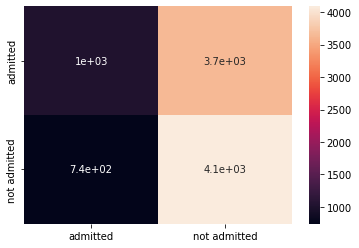

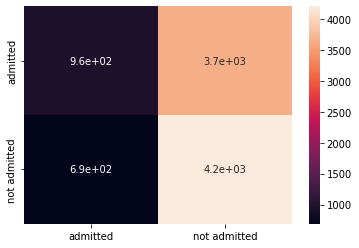

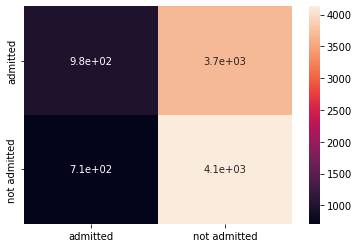

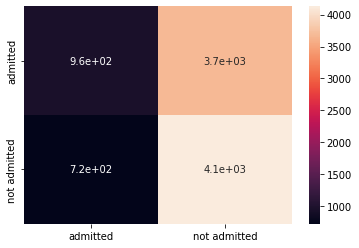

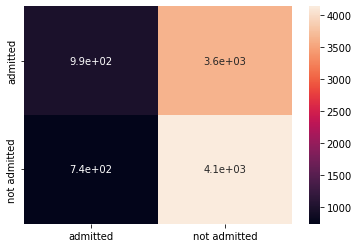

In [98]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm18 = confusion_matrix(y, gnb1_predy[i])
    print(cm18)
    cm18df = pd.DataFrame(cm18, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm18df, annot=True)

[[2847 1827]
 [2313 2516]]
[[2831 1779]
 [2402 2492]]
[[2825 1839]
 [2274 2566]]
[[2927 1723]
 [2314 2540]]
[[2871 1755]
 [2384 2494]]


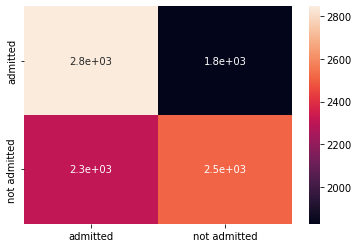

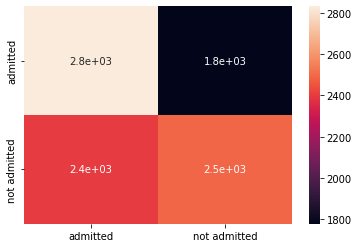

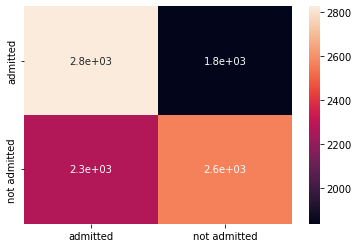

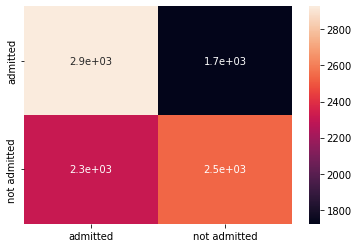

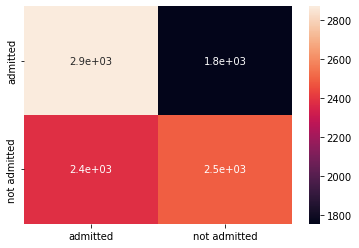

In [99]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm19 = confusion_matrix(y, mnb1_predy[i])
    print(cm19)
    cm19df = pd.DataFrame(cm19, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm19df, annot=True)

In [100]:
#TensorFlow MLP
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

n_nodes_hl1 = 30
n_nodes_hl2 = 45
n_nodes_hl3 = 16

n_classes = 2
batch_size = 100

#x = tf.compat.v1.placeholder(tf.float32, shape=(None, 15))
#y = tf.compat.v1.placeholder(tf.float32, shape=(None, 2))
x = tf.compat.v1.placeholder(tf.float32)
y = tf.compat.v1.placeholder(tf.float32)
#x = tf.placeholder('float', [None, 15])
#y = tf.placeholder('float',[None,2])

def neuralnetwork(data):
    hiddenlayer1 = {'weights':tf.Variable(tf.random.normal([15, n_nodes_hl1])), 'biases':tf.Variable(tf.random.normal([n_nodes_hl1]))}
    hiddenlayer2 = {'weights':tf.Variable(tf.random.normal([n_nodes_hl1, n_nodes_hl2])), 'biases':tf.Variable(tf.random.normal([n_nodes_hl2]))}
    # hiddenlayer3 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    outputlayer = {'weights':tf.Variable(tf.random.normal([n_nodes_hl2, n_classes])),
                    'biases':tf.Variable(tf.random.normal([n_classes])),}

    l1 = tf.add(tf.matmul(data,hiddenlayer1['weights']), hiddenlayer1['biases'])
    l1 = tf.nn.tanh(l1)
    l2 = tf.add(tf.matmul(l1,hiddenlayer2['weights']), hiddenlayer2['biases'])
    l2 = tf.nn.tanh(l2)
    
    # l3 = tf.add(tf.matmul(l2,hiddenlayer3['weights']), hiddenlayer3['biases'])
    # l3 = tf.nn.tanh(l3)
    output = tf.matmul(l2,outputlayer['weights']) + outputlayer['biases']
    output=tf.nn.softmax(output)
    return output

In [101]:
cwd = os.getcwd()
print(cwd)

/content/drive/MyDrive


In [102]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df_yaten = enc.fit_transform(df_ya.reshape(-1,1)).toarray()
df_ybcdeten = enc.fit_transform(df_ybcde.reshape(-1,1)).toarray()
df_ybten = enc.fit_transform(df_yb.reshape(-1,1)).toarray()
df_yacdeten = enc.fit_transform(df_yacde.reshape(-1,1)).toarray()
df_ycten = enc.fit_transform(df_yc.reshape(-1,1)).toarray()
df_yabdeten = enc.fit_transform(df_yabde.reshape(-1,1)).toarray()
df_ydten = enc.fit_transform(df_yd.reshape(-1,1)).toarray()
df_yabceten = enc.fit_transform(df_yabce.reshape(-1,1)).toarray()
df_yeten = enc.fit_transform(df_ye.reshape(-1,1)).toarray()
df_yabcdten = enc.fit_transform(df_yabcd.reshape(-1,1)).toarray()

In [103]:
def train_neural_network(x):
    prediction = neuralnetwork(x)
    eploss=[]
    eplosstrain=[]
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))

    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
    # print(optimizer)
    # tf.optimizers.Adam()
    #tf.compat.v1.Session() converted from tf.Session()
    hm_epochs = 1000
    with tf.compat.v1.Session() as sess:
        # OLD:
        # sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.compat.v1.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            epoch_losstrain=0
            # for i in range(40613):
            #     epoch_x, epoch_y =dfbcde[i].reshape(1,-1),df_ybcde[i].reshape(1,-1) 
            #     # print(type((epoch_x)))
            #     lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
            #     epoch_loss += c
            #     print(lam,c)
            # for index in range(0,38868,10000):
            #   epoch_x, epoch_y =dfbcde[index:index+10000,:],df_ybcdeten[index:index+10000,:]
            #   lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
            #   # lam, c1 = sess.run([optimizer, cost], feed_dict={x: (dfa), y: (df_yaten)})
            epoch_x, epoch_y =dfbcde,df_ybcdeten
            lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
            epoch_loss += c
            eploss.append(epoch_loss)

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
        print(prediction)
        predy=prediction.eval({x:dfa,y:df_yaten})

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print("accuracy on train:",accuracy.eval({x:dfbcde,y:df_ybcdeten}))
        print('Accuracy on test :',accuracy.eval({x:dfa, y:df_yaten}))
    return eploss,predy

In [104]:
losslist, predy = train_neural_network(x)

Epoch 0 completed out of 1000 loss: 0.7677555680274963
Epoch 1 completed out of 1000 loss: 0.7674770355224609
Epoch 2 completed out of 1000 loss: 0.7672230005264282
Epoch 3 completed out of 1000 loss: 0.7669600248336792
Epoch 4 completed out of 1000 loss: 0.7666897177696228
Epoch 5 completed out of 1000 loss: 0.7664241194725037
Epoch 6 completed out of 1000 loss: 0.7661872506141663
Epoch 7 completed out of 1000 loss: 0.7660010457038879
Epoch 8 completed out of 1000 loss: 0.7658470869064331
Epoch 9 completed out of 1000 loss: 0.7656955122947693
Epoch 10 completed out of 1000 loss: 0.7655259966850281
Epoch 11 completed out of 1000 loss: 0.7653590440750122
Epoch 12 completed out of 1000 loss: 0.7651945352554321
Epoch 13 completed out of 1000 loss: 0.765020489692688
Epoch 14 completed out of 1000 loss: 0.7648451924324036
Epoch 15 completed out of 1000 loss: 0.764684796333313
Epoch 16 completed out of 1000 loss: 0.7645321488380432
Epoch 17 completed out of 1000 loss: 0.7643814086914062
Epoc

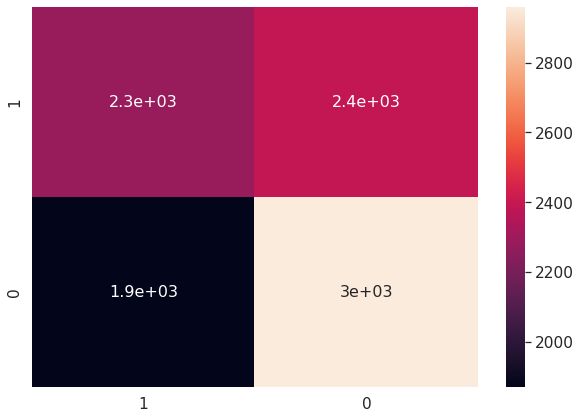

In [105]:
predy=np.argmax(predy,axis=1)
cm8 = confusion_matrix(df_ya,predy)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size


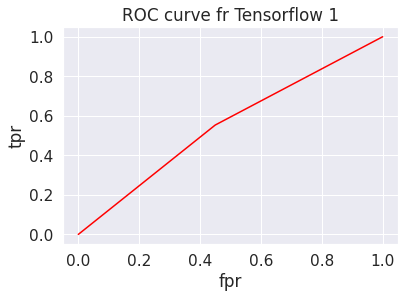

In [106]:
fpr, tpr, _ = roc_curve(predy, df_ya, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 1')
plt.show()

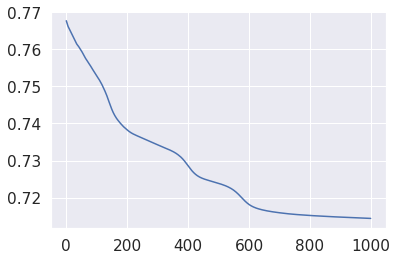

In [107]:
seq = np.arange(1000).tolist()
plt.plot(seq, losslist)
plt.show()

In [108]:
#TensorFlow MLP

n_nodes_hl1 =30
n_nodes_hl2=45
n_nodes_hl3=10
n_nodes_hl4=8
n_classes = 2

x = tf.compat.v1.placeholder('float', [None, 15])
y = tf.compat.v1.placeholder('float',[None,2])

def neuralnetwork2(data):
    hiddenlayer1 = {'weights':tf.Variable(tf.random.normal([15, n_nodes_hl1])), 'biases':tf.Variable(tf.random.normal([n_nodes_hl1]))}
    hiddenlayer2 = {'weights':tf.Variable(tf.random.normal([n_nodes_hl1, n_nodes_hl2])), 'biases':tf.Variable(tf.random.normal([n_nodes_hl2]))}
#     hiddenlayer3 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    # hiddenlayer4 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl4]))}
    outputlayer = {'weights':tf.Variable(tf.random.normal([n_nodes_hl2, n_classes])), 'biases':tf.Variable(tf.random.normal([n_classes])),}

    l1 = tf.add(tf.matmul(data,hiddenlayer1['weights']), hiddenlayer1['biases'])
    l1 = tf.nn.tanh(l1)
    l2 = tf.add(tf.matmul(l1,hiddenlayer2['weights']), hiddenlayer2['biases'])
    l2 = tf.nn.tanh(l2)
#     l3 = tf.add(tf.matmul(l2,hiddenlayer3['weights']), hiddenlayer3['biases'])
#     l3 = tf.nn.tanh(l3)
    # l4 = tf.add(tf.matmul(l3,hiddenlayer4['weights']), hiddenlayer4['biases'])
    # l4 = tf.nn.tanh(l4)

    output = tf.matmul(l2,outputlayer['weights']) + outputlayer['biases']
    output=tf.nn.softmax(output)

    return output

In [109]:
def train_neural_network2(x, dfx, dfy, dftestx, dftesty):
    prediction = neuralnetwork2(x)
    eploss=[]
    eplosstrain=[]
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y ))
    
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
    # print(optimizer)
    
    epochs = 1000
    with tf.compat.v1.Session() as sess:
        # OLD:
        # sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.compat.v1.global_variables_initializer())

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_losstrain=0
            # for i in range(40613):
            #     epoch_x, epoch_y =dfbcde[i].reshape(1,-1),df_ybcde[i].reshape(1,-1) 
            #     # print(type((epoch_x)))
            #     lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
            #     epoch_loss += c
            #     print(lam,c)
            for index in range(0,38867,10000):
                epoch_x, epoch_y =dfx[index:index+10000,:],dfy[index:index+10000,:]
                lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
                # lam, c1 = sess.run([optimizer, cost], feed_dict={x: (dfa), y: (df_yaten)})
                epoch_loss += c
            eploss.append(epoch_loss)
  
            print('Epoch', epoch, 'completed out of',epochs,'loss:',epoch_loss)
        print(prediction)
        # confusion = tf.confusion_matrix(labels=y, predictions=prediction, num_classes=2)
        predy=prediction.eval({x:dftestx,y:dftesty})
        print(predy)
        print(np.array_equal(predy,dftesty))
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print("accuracy on train:",accuracy.eval({x:dfx,y:dfy}))
        print('Accuracy on test :',accuracy.eval({x:dftestx, y:dftesty}))
        # print(confusion.eval(session=sess))
        print(dftesty)
    return eploss, predy

In [110]:
losslist2, predy2 = train_neural_network2(x, dfacde, df_yacdeten, dfb, df_ybten)
predy2 = np.argmax(predy2, axis=1)
print(predy2)

Epoch 0 completed out of 1000 loss: 3.2167431116104126
Epoch 1 completed out of 1000 loss: 3.2141500115394592
Epoch 2 completed out of 1000 loss: 3.21168714761734
Epoch 3 completed out of 1000 loss: 3.2093674540519714
Epoch 4 completed out of 1000 loss: 3.2072760462760925
Epoch 5 completed out of 1000 loss: 3.205105185508728
Epoch 6 completed out of 1000 loss: 3.202934980392456
Epoch 7 completed out of 1000 loss: 3.200737237930298
Epoch 8 completed out of 1000 loss: 3.19860577583313
Epoch 9 completed out of 1000 loss: 3.196517050266266
Epoch 10 completed out of 1000 loss: 3.1945505142211914
Epoch 11 completed out of 1000 loss: 3.192757248878479
Epoch 12 completed out of 1000 loss: 3.191031575202942
Epoch 13 completed out of 1000 loss: 3.189488470554352
Epoch 14 completed out of 1000 loss: 3.1879228353500366
Epoch 15 completed out of 1000 loss: 3.186348557472229
Epoch 16 completed out of 1000 loss: 3.1848835349082947
Epoch 17 completed out of 1000 loss: 3.18340802192688
Epoch 18 complet

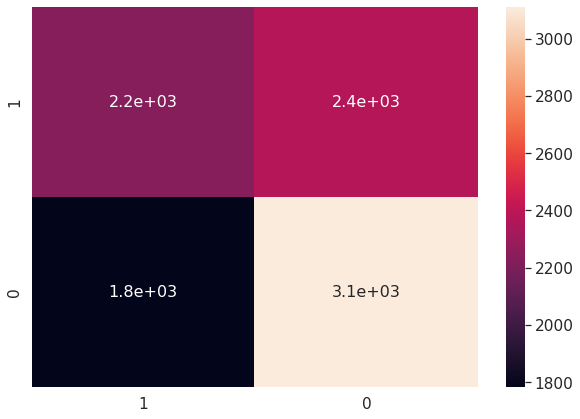

In [111]:
cm8 = confusion_matrix(df_yb,predy2)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size

# plt.show()
# ig, ax = plt.subplots()
# cm = confusion_matrix(df_yb, predy2)

# im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# ax.figure.colorbar(im, ax=ax)

# ax.set(yticks=[-0.5, 1.5], 
#        xticks=[0, 1], 
#        yticklabels=[1,0], 
#        xticklabels=[1,0])
# # ax.yaxis.set_major_locator(ticker.IndexLocater(base=1, offset=0.5))
# ax.yaxis.set_major_locator(mat.ticker.IndexLocator(base=1, offset=0.5))
# seaborn.heatmap(cm8df, annot=True)

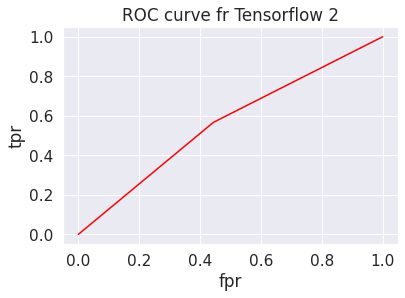

In [112]:
fpr, tpr, _ = roc_curve(predy2, df_yb, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 2')
plt.show()

In [113]:
losslist3,predy3 = train_neural_network2(x, dfabde, df_yabdeten, dfc, df_ycten)
predy3=np.argmax(predy3,axis=1)

Epoch 0 completed out of 1000 loss: 3.0239506363868713
Epoch 1 completed out of 1000 loss: 3.0188176035881042
Epoch 2 completed out of 1000 loss: 3.014389932155609
Epoch 3 completed out of 1000 loss: 3.0101510882377625
Epoch 4 completed out of 1000 loss: 3.0058910250663757
Epoch 5 completed out of 1000 loss: 3.001578152179718
Epoch 6 completed out of 1000 loss: 2.997055768966675
Epoch 7 completed out of 1000 loss: 2.9932547211647034
Epoch 8 completed out of 1000 loss: 2.9898117184638977
Epoch 9 completed out of 1000 loss: 2.9867305755615234
Epoch 10 completed out of 1000 loss: 2.983911633491516
Epoch 11 completed out of 1000 loss: 2.9811673164367676
Epoch 12 completed out of 1000 loss: 2.978346347808838
Epoch 13 completed out of 1000 loss: 2.9755216240882874
Epoch 14 completed out of 1000 loss: 2.9729374647140503
Epoch 15 completed out of 1000 loss: 2.970573127269745
Epoch 16 completed out of 1000 loss: 2.9683302640914917
Epoch 17 completed out of 1000 loss: 2.9661394357681274
Epoch 18

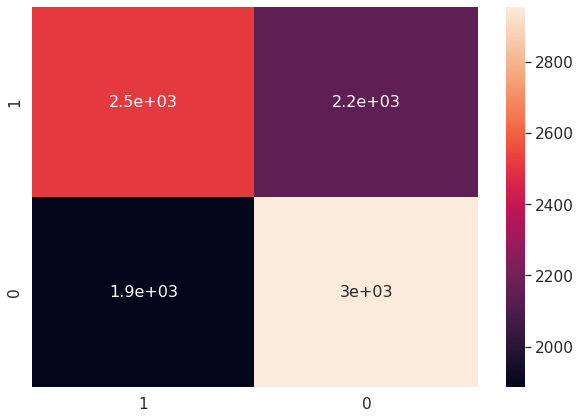

In [114]:
cm8 = confusion_matrix(df_yc,predy3)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size


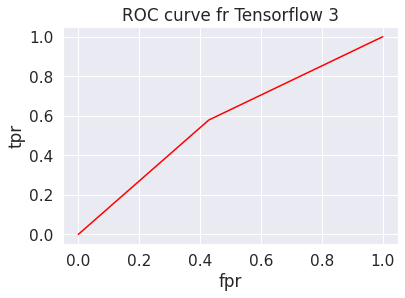

In [115]:
fpr, tpr, _ = roc_curve(predy3, df_yc, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 3')
plt.show()

In [116]:
losslist4,predy4 = train_neural_network2(x, dfabce, df_yabceten, dfd, df_ydten)
predy4=np.argmax(predy4,axis=1)

Epoch 0 completed out of 1000 loss: 3.1858112812042236
Epoch 1 completed out of 1000 loss: 3.1787965297698975
Epoch 2 completed out of 1000 loss: 3.171804428100586
Epoch 3 completed out of 1000 loss: 3.1645132303237915
Epoch 4 completed out of 1000 loss: 3.15672767162323
Epoch 5 completed out of 1000 loss: 3.1484209299087524
Epoch 6 completed out of 1000 loss: 3.1395082473754883
Epoch 7 completed out of 1000 loss: 3.1299937963485718
Epoch 8 completed out of 1000 loss: 3.120012938976288
Epoch 9 completed out of 1000 loss: 3.109621226787567
Epoch 10 completed out of 1000 loss: 3.0989246368408203
Epoch 11 completed out of 1000 loss: 3.0880157947540283
Epoch 12 completed out of 1000 loss: 3.076889991760254
Epoch 13 completed out of 1000 loss: 3.0658923387527466
Epoch 14 completed out of 1000 loss: 3.05560439825058
Epoch 15 completed out of 1000 loss: 3.046063184738159
Epoch 16 completed out of 1000 loss: 3.037380039691925
Epoch 17 completed out of 1000 loss: 3.029814600944519
Epoch 18 comp

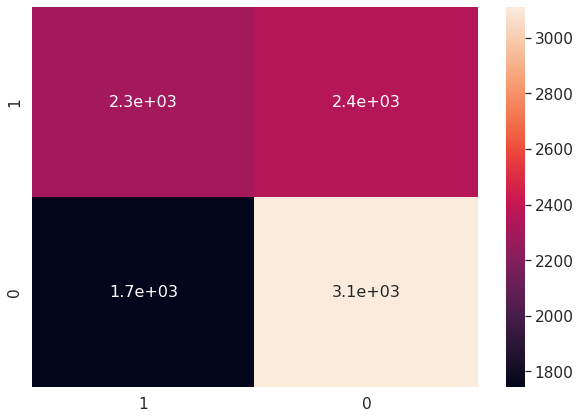

In [117]:
cm8 = confusion_matrix(df_yd,predy4)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size


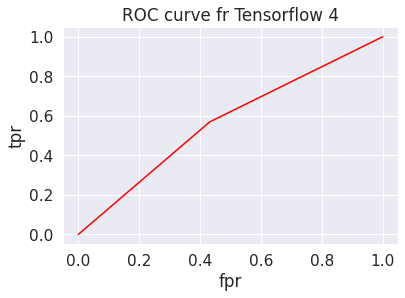

In [118]:
fpr, tpr, _ = roc_curve(predy4, df_yd, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 4')
plt.show()

In [119]:
losslist5,predy5 = train_neural_network2(x, dfabcd, df_yabcdten, dfe, df_yeten)
predy5 = np.argmax(predy5,axis=1)


Epoch 0 completed out of 1000 loss: 3.271365225315094
Epoch 1 completed out of 1000 loss: 3.2695305943489075
Epoch 2 completed out of 1000 loss: 3.267729938030243
Epoch 3 completed out of 1000 loss: 3.265786290168762
Epoch 4 completed out of 1000 loss: 3.2637287974357605
Epoch 5 completed out of 1000 loss: 3.2615357041358948
Epoch 6 completed out of 1000 loss: 3.259166717529297
Epoch 7 completed out of 1000 loss: 3.2565605640411377
Epoch 8 completed out of 1000 loss: 3.253657341003418
Epoch 9 completed out of 1000 loss: 3.2503844499588013
Epoch 10 completed out of 1000 loss: 3.2467337250709534
Epoch 11 completed out of 1000 loss: 3.2427240014076233
Epoch 12 completed out of 1000 loss: 3.238302528858185
Epoch 13 completed out of 1000 loss: 3.2334075570106506
Epoch 14 completed out of 1000 loss: 3.2280402779579163
Epoch 15 completed out of 1000 loss: 3.22214674949646
Epoch 16 completed out of 1000 loss: 3.215697467327118
Epoch 17 completed out of 1000 loss: 3.2087268829345703
Epoch 18 co

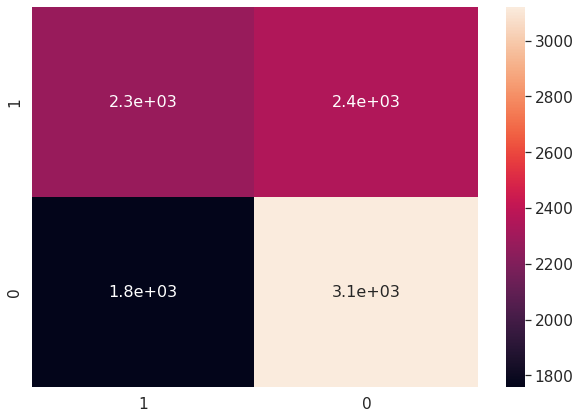

In [120]:
cm8 = confusion_matrix(df_ye,predy5)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size


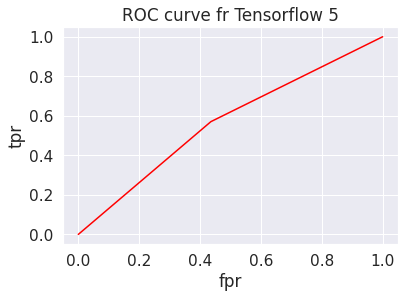

In [121]:
fpr, tpr, _ = roc_curve(predy5, df_ye, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 5')
plt.show()

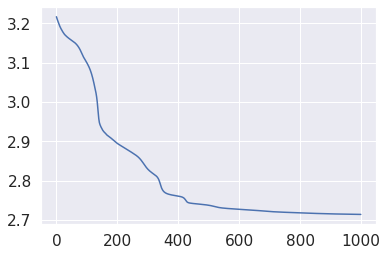

In [122]:
seq = np.arange(1000).tolist()
plt.plot(seq, losslist2)
plt.show()

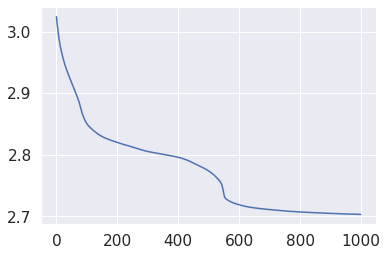

In [123]:
plt.plot(seq, losslist3)
plt.show()

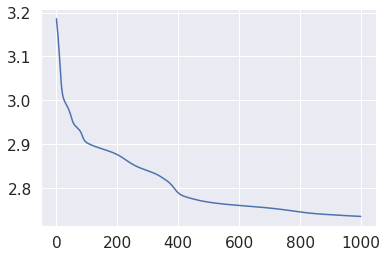

In [124]:
plt.plot(seq, losslist4)
plt.show()

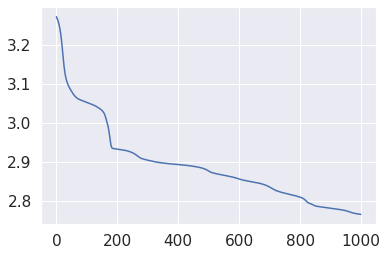

In [125]:
plt.plot(seq, losslist5)
plt.show()

In [126]:
print("F1 Score for fold 1 of Tensorflow model:", f1_score(df_ya, predy))
print("F1 Score for fold 2 of Tensorflow model:", f1_score(df_yb, predy2))
print("F1 Score for fold 3 of Tensorflow model:", f1_score(df_yc, predy3))
print("F1 Score for fold 4 of Tensorflow model:", f1_score(df_yd, predy4))
print("F1 Score for fold 5 of Tensorflow model:", f1_score(df_ye, predy5))

F1 Score for fold 1 of Tensorflow model: 0.5816466889369228
F1 Score for fold 2 of Tensorflow model: 0.5993836671802774
F1 Score for fold 3 of Tensorflow model: 0.5940673705379588
F1 Score for fold 4 of Tensorflow model: 0.6029069767441861
F1 Score for fold 5 of Tensorflow model: 0.6031500628080008


In [127]:
from sklearn.metrics import classification_report, recall_score, precision_score, precision_recall_curve

In [128]:
# from inspect import signature
# # https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
# print(len(df_ya), len(svm1_predy[0]))
# precision, recall, _ = precision_recall_curve(df_ya, svm1_predy[0])
# print(precision, recall, _)
# # step_kwargs = ({'step': 'post'}
# #                if 'step' in signature(plt.fill_between).parameters
# #                else {})
# plt.step(recall, precision, color='red', alpha=0.2, where='post')
# # plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# # plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [129]:
print("SVM1 Model")
print(classification_report(df_ya, svm1_predy[0]))
print(classification_report(df_yb, svm1_predy[1]))
print(classification_report(df_yc, svm1_predy[2]))
print(classification_report(df_yd, svm1_predy[3]))
print(classification_report(df_ye, svm1_predy[4]))

print("SVM5 Model")
print(classification_report(df_ya, svm5_predy[0]))
print(classification_report(df_yb, svm5_predy[1]))
print(classification_report(df_yc, svm5_predy[2]))
print(classification_report(df_yd, svm5_predy[3]))
print(classification_report(df_ye, svm5_predy[4]))

#print(classification_report(df_ya, svm6_predy[0]))
#print(classification_report(df_yb, svm6_predy[1]))
#print(classification_report(df_yc, svm6_predy[2]))
#print(classification_report(df_yd, svm6_predy[3]))
#print(classification_report(df_ye, svm6_predy[4]))

print("KNN1 Model")
print(classification_report(df_ya, knn1_predy[0]))
print(classification_report(df_yb, knn1_predy[1]))
print(classification_report(df_yc, knn1_predy[2]))
print(classification_report(df_yd, knn1_predy[3]))
print(classification_report(df_ye, knn1_predy[4]))

print("KNN2 Model")

print(classification_report(df_ya, knn2_predy[0]))
print(classification_report(df_yb, knn2_predy[1]))
print(classification_report(df_yc, knn2_predy[2]))
print(classification_report(df_yd, knn2_predy[3]))
print(classification_report(df_ye, knn2_predy[4]))

print("RFC1 Model")
print(classification_report(df_ya, rfc1_predy[0]))
print(classification_report(df_yb, rfc1_predy[1]))
print(classification_report(df_yc, rfc1_predy[2]))
print(classification_report(df_yd, rfc1_predy[3]))
print(classification_report(df_ye, rfc1_predy[4]))

print("RFC2 model")
print(classification_report(df_ya, rfc2_predy[0]))
print(classification_report(df_yb, rfc2_predy[1]))
print(classification_report(df_yc, rfc2_predy[2]))
print(classification_report(df_yd, rfc2_predy[3]))
print(classification_report(df_ye, rfc2_predy[4]))

print("RFC3 model")
print(classification_report(df_ya, rfc3_predy[0]))
print(classification_report(df_yb, rfc3_predy[1]))
print(classification_report(df_yc, rfc3_predy[2]))
print(classification_report(df_yd, rfc3_predy[3]))
print(classification_report(df_ye, rfc3_predy[4]))

print("MLP1 Model")
print(classification_report(df_ya, mlp1_predy[0]))
print(classification_report(df_yb, mlp1_predy[1]))
print(classification_report(df_yc, mlp1_predy[2]))
print(classification_report(df_yd, mlp1_predy[3]))
print(classification_report(df_ye, mlp1_predy[4]))

print("MLP2 model")
print(classification_report(df_ya, mlp2_predy[0]))
print(classification_report(df_yb, mlp2_predy[1]))
print(classification_report(df_yc, mlp2_predy[2]))
print(classification_report(df_yd, mlp2_predy[3]))
print(classification_report(df_ye, mlp2_predy[4]))

print("Logr1 Model")
print(classification_report(df_ya, logr1_predy[0]))
print(classification_report(df_yb, logr1_predy[1]))
print(classification_report(df_yc, logr1_predy[2]))
print(classification_report(df_yd, logr1_predy[3]))
print(classification_report(df_ye, logr1_predy[4]))

print("Logr2 model")
print(classification_report(df_ya, logr2_predy[0]))
print(classification_report(df_yb, logr2_predy[1]))
print(classification_report(df_yc, logr2_predy[2]))
print(classification_report(df_yd, logr2_predy[3]))
print(classification_report(df_ye, logr2_predy[4]))

print("bnb1 model")
print(classification_report(df_ya, bnb1_predy[0]))
print(classification_report(df_yb, bnb1_predy[1]))
print(classification_report(df_yc, bnb1_predy[2]))
print(classification_report(df_yd, bnb1_predy[3]))
print(classification_report(df_ye, bnb1_predy[4]))

print("cnb1 model")
print(classification_report(df_ya, cnb1_predy[0]))
print(classification_report(df_yb, cnb1_predy[1]))
print(classification_report(df_yc, cnb1_predy[2]))
print(classification_report(df_yd, cnb1_predy[3]))
print(classification_report(df_ye, cnb1_predy[4]))

print("gnb1 model")
print(classification_report(df_ya, gnb1_predy[0]))
print(classification_report(df_yb, gnb1_predy[1]))
print(classification_report(df_yc, gnb1_predy[2]))
print(classification_report(df_yd, gnb1_predy[3]))
print(classification_report(df_ye, gnb1_predy[4]))

print("MNB1 model")
print(classification_report(df_ya, mnb1_predy[0]))
print(classification_report(df_yb, mnb1_predy[1]))
print(classification_report(df_yc, mnb1_predy[2]))
print(classification_report(df_yd, mnb1_predy[3]))
print(classification_report(df_ye, mnb1_predy[4]))

SVM1 Model
              precision    recall  f1-score   support

           0       0.55      0.69      0.61      4674
           1       0.60      0.45      0.51      4829

    accuracy                           0.57      9503
   macro avg       0.57      0.57      0.56      9503
weighted avg       0.57      0.57      0.56      9503

              precision    recall  f1-score   support

           0       0.53      0.68      0.60      4610
           1       0.59      0.44      0.51      4894

    accuracy                           0.56      9504
   macro avg       0.56      0.56      0.55      9504
weighted avg       0.57      0.56      0.55      9504

              precision    recall  f1-score   support

           0       0.55      0.69      0.61      4664
           1       0.60      0.46      0.52      4840

    accuracy                           0.57      9504
   macro avg       0.58      0.57      0.57      9504
weighted avg       0.58      0.57      0.56      9504

        

In [130]:
df.columns

Index(['Program', 'Research Exp', 'Industry Exp', 'Intern Exp', 'Journal Pubs',
       'ConfPubs', 'TOEFL Score', 'TOEFL Essay', 'greV', 'greQ', 'greA',
       'Topper CGPA', 'CGPA', 'UG label', 'ranking'],
      dtype='object')

In [131]:
# x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
x_new = []
feat = list(df.columns) 
for i in feat:
  print(i)
  val = input("Enter: ") 
  x_new.append(val)
x_new

Program
Enter: 1
Research Exp
Enter: 2
Industry Exp
Enter: 3
Intern Exp
Enter: 2
Journal Pubs
Enter: 0
ConfPubs
Enter: 0
TOEFL Score
Enter: 110
TOEFL Essay
Enter: 20
greV
Enter: 43
greQ
Enter: 56
greA
Enter: 2
Topper CGPA
Enter: 9.0
CGPA
Enter: 3.4
UG label
Enter: 1348
ranking
Enter: 72


['1',
 '2',
 '3',
 '2',
 '0',
 '0',
 '110',
 '20',
 '43',
 '56',
 '2',
 '9.0',
 '3.4',
 '1348',
 '72']

In [132]:
#x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
#x_new=['0.2','0.3','0.3', '0.3', '0.3', '0.3', '0.3', '0.3', '0.3', '6', '5', '6', '8', '7', '1', '1', '1', '5', '6', '1', '1', '2', '2', '7', '4', '1', '8', '1','1', '7', '1', '0','1','0','0','1','1','1']
print("BNB1 Model")
for i in range(5):
  new_pred  = bnb1[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("CNB1 model")
for i in range(5):
  new_pred  = cnb1[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("GNB1 model")
for i in range(5):
  new_pred  = gnb1[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("KNN1 Model")
for i in range(5):
  new_pred  = knn1[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("knn2 model")
for i in range(5):
  new_pred  = knn2[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")
  
print("logr1 model")
for i in range(5):
  new_pred  = logr1[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("mlp1 model")
for i in range(5):
  new_pred  = mlp1[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("mnb1 model")
for i in range(5):
  new_pred  = mnb1[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("RFC1 model")
for i in range(5):
  new_pred  = rfc1[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("RFC2 Model")
for i in range(5):
  new_pred  = rfc2[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("RFC3 model")

for i in range(5):
  new_pred  = rfc3[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("SVM1 model")
for i in range(5):
  new_pred  = svm1[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")

print("SVM5 Model")

for i in range(5):
  new_pred  = svm5[i].predict([x_new])
  if new_pred.item()==1:
    print("Admitted")
  else:
    print("Not Admitted")
#print("Prediction : {}".format(z1[z1['Associated Number']==new_pred[0]]['job']))


BNB1 Model
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
CNB1 model
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
GNB1 model
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
KNN1 Model
Admitted
Admitted
Admitted
Admitted
Admitted
knn2 model
Admitted
Admitted
Admitted
Admitted
Admitted
logr1 model
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
mlp1 model
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
mnb1 model
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
RFC1 model
Admitted
Admitted
Admitted
Admitted
Admitted
RFC2 Model
Admitted
Admitted
Admitted
Admitted
Admitted
RFC3 model


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array

Admitted
Admitted
Admitted
Admitted
Admitted
SVM1 model
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
SVM5 Model
Not Admitted
Not Admitted
Not Admitted
Not Admitted
Not Admitted
